Missing parties in the orientation dictionary: set()


/tmp/ipykernel_52138/1489803853.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_numeric[col] = pd.to_numeric(data_numeric[col], errors='coerce')


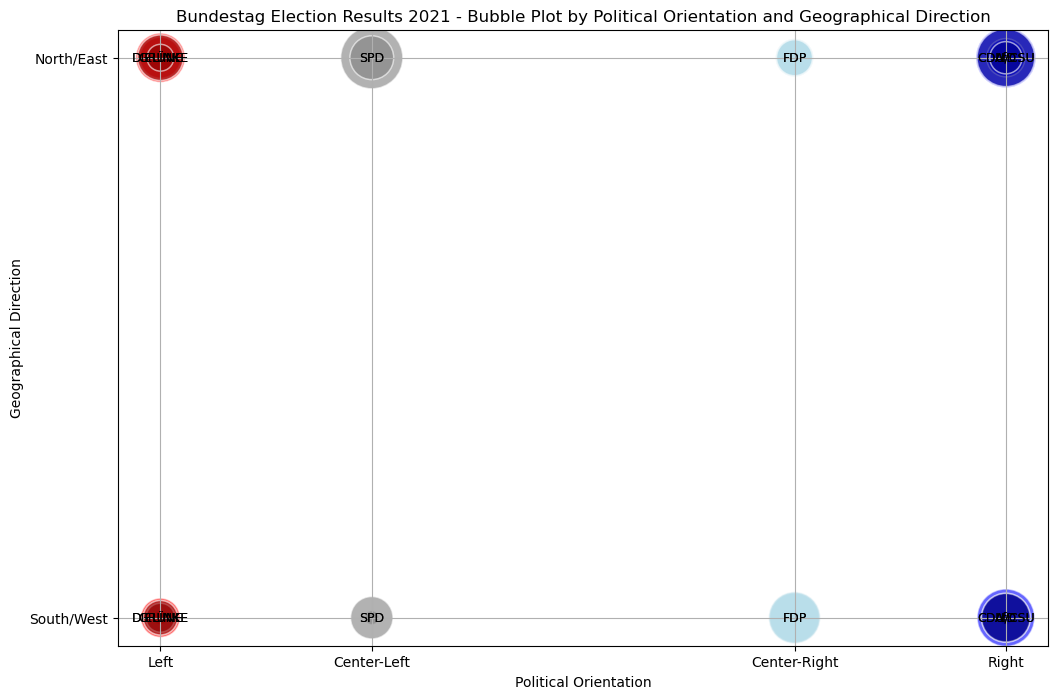

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = './hdata1.csv'
data = pd.read_csv(file_path)

# Clean column names
data.columns = data.columns.str.strip()

# Define the geographical direction for each Bundesland
geographical_direction = {
    'Baden-Württemberg': 'South', 'Bayern': 'South', 'Berlin': 'East', 'Brandenburg': 'East',
    'Bremen': 'North', 'Hamburg': 'North', 'Hessen': 'West', 'Mecklenburg-Vorpommern': 'East',
    'Niedersachsen': 'North', 'Nordrhein-Westfalen': 'West', 'Rheinland-Pfalz': 'West',
    'Saarland': 'West', 'Sachsen': 'East', 'Sachsen-Anhalt': 'East', 'Schleswig-Holstein': 'North',
    'Thüringen': 'East'
}

# Assign geographical direction to the data
data['Geographical_Direction'] = data['Bundesland'].map(geographical_direction)

# Select only relevant columns (party votes) before aggregation
data_numeric = data[['Bundesland', 'CDU/CSU', 'SPD', 'GRÜNE', 'FDP', 'AfD', 'DIELINKE', 'Geographical_Direction']]

# Convert relevant columns to numeric (if not already)
for col in ['CDU/CSU', 'SPD', 'GRÜNE', 'FDP', 'AfD', 'DIELINKE']:
    data_numeric[col] = pd.to_numeric(data_numeric[col], errors='coerce')

# Aggregate votes by geographical direction
aggregated_data = data_numeric.groupby('Geographical_Direction').sum()

# Transform the data to long format for plotting
long_data = aggregated_data.reset_index().melt(id_vars='Geographical_Direction', var_name='Party', value_name='Votes')

# Exclude 'Bundesland' from party names
long_data = long_data[long_data['Party'] != 'Bundesland']

# Define political orientation and colors
party_orientation = {
    'CDU/CSU': ('right', 'blue'), 'SPD': ('center-left', 'grey'), 'GRÜNE': ('left', 'red'),
    'FDP': ('center-right', 'lightblue'), 'AfD': ('right', 'darkblue'), 'DIELINKE': ('left', 'darkred')
}

# Check for discrepancies in party names
missing_parties = set(long_data['Party'].unique()) - set(party_orientation.keys())
print(f"Missing parties in the orientation dictionary: {missing_parties}")

# Manually correct any discrepancies
long_data['Party'] = long_data['Party'].str.strip()

# Map political orientation and colors to the data
long_data['Orientation'] = long_data['Party'].map(lambda x: party_orientation[x][0])
long_data['Color'] = long_data['Party'].map(lambda x: party_orientation[x][1])

# Coordinates for plotting based on political orientation
orientation_coords = {
    'left': (-1, 0), 'center-left': (-0.5, 0), 'center-right': (0.5, 0), 'right': (1, 0)
}
long_data['X'] = long_data['Orientation'].map(lambda x: orientation_coords[x][0])
long_data['Y'] = long_data['Geographical_Direction'].map(lambda x: 1 if x in ['North', 'East'] else -1)

# Correct the palette by defining it as a dictionary
palette = {color: color for color in long_data['Color'].unique()}

# Plotting
plt.figure(figsize=(12, 8))
sns.scatterplot(data=long_data, x='X', y='Y', size='Votes', hue='Color', palette=palette,
                sizes=(100, 2000), legend=False, alpha=0.6)

# Add annotations
for index, row in long_data.iterrows():
    plt.text(row['X'], row['Y'], row['Party'], horizontalalignment='center', verticalalignment='center', fontsize=9)

plt.xlabel('Political Orientation')
plt.ylabel('Geographical Direction')
plt.title('Bundestag Election Results 2021 - Bubble Plot by Political Orientation and Geographical Direction')
plt.xticks([-1, -0.5, 0.5, 1], ['Left', 'Center-Left', 'Center-Right', 'Right'])
plt.yticks([-1, 1], ['South/West', 'North/East'])
plt.grid(True)

# Show plot
plt.show()


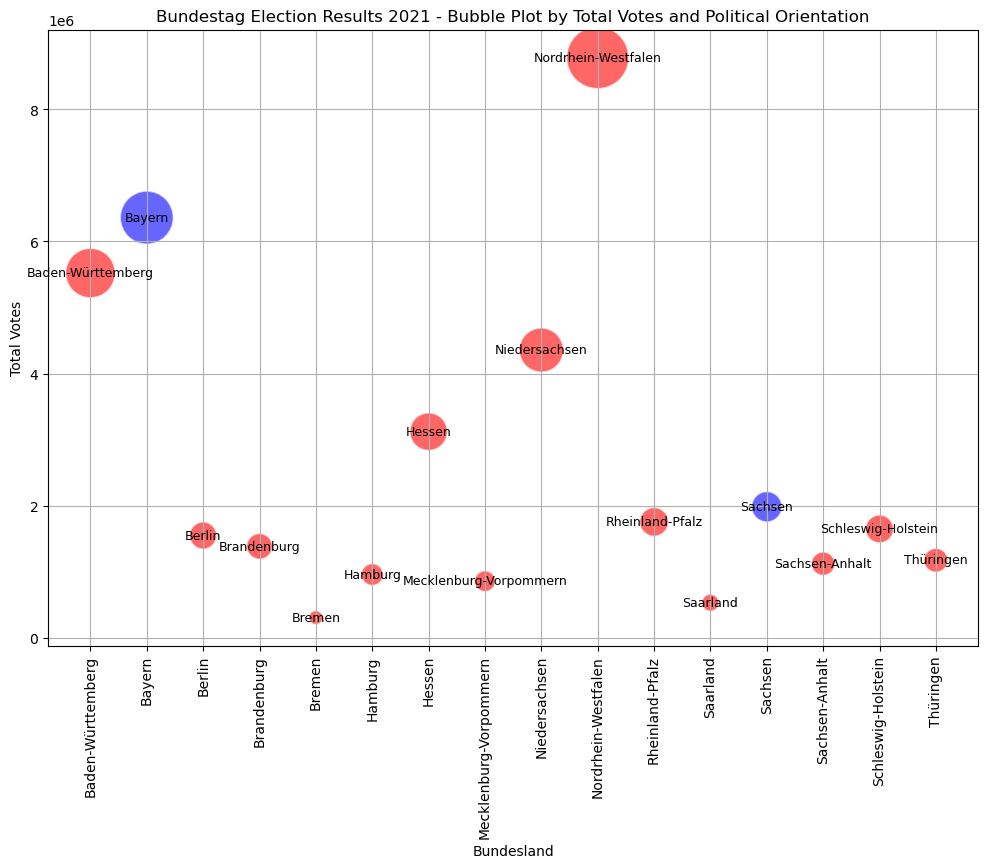

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = './hdata1.csv'
data = pd.read_csv(file_path)

# Clean column names
data.columns = data.columns.str.strip()

# Ensure columns are treated as strings and remove periods from numeric columns
for col in ['CDU/CSU', 'SPD', 'GRÜNE', 'FDP', 'AfD', 'DIELINKE']:
    data[col] = data[col].astype(str).str.replace('.', '', regex=False).astype(float)

# Define right-leaning parties
right_parties = ['CDU/CSU', 'AfD']

# Calculate total votes and right-leaning votes
data['Total_Votes'] = data[['CDU/CSU', 'SPD', 'GRÜNE', 'FDP', 'AfD', 'DIELINKE']].sum(axis=1)
data['Right_Votes'] = data[right_parties].sum(axis=1)

# Determine bubble color based on more votes for right-leaning parties
data['Color'] = data['Right_Votes'] > (data['Total_Votes'] / 2)
data['Color'] = data['Color'].map({True: 'blue', False: 'red'})

# Plotting
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data, x='Bundesland', y='Total_Votes', size='Total_Votes', hue='Color',
                sizes=(100, 2000), legend=False, alpha=0.6, palette=['red', 'blue'])

# Add annotations
for index, row in data.iterrows():
    plt.text(index, row['Total_Votes'], row['Bundesland'], horizontalalignment='center', verticalalignment='center', fontsize=9)

plt.xlabel('Bundesland')
plt.ylabel('Total Votes')
plt.title('Bundestag Election Results 2021 - Bubble Plot by Total Votes and Political Orientation')
plt.xticks(rotation=90)
plt.grid(True)

# Show plot
plt.show()



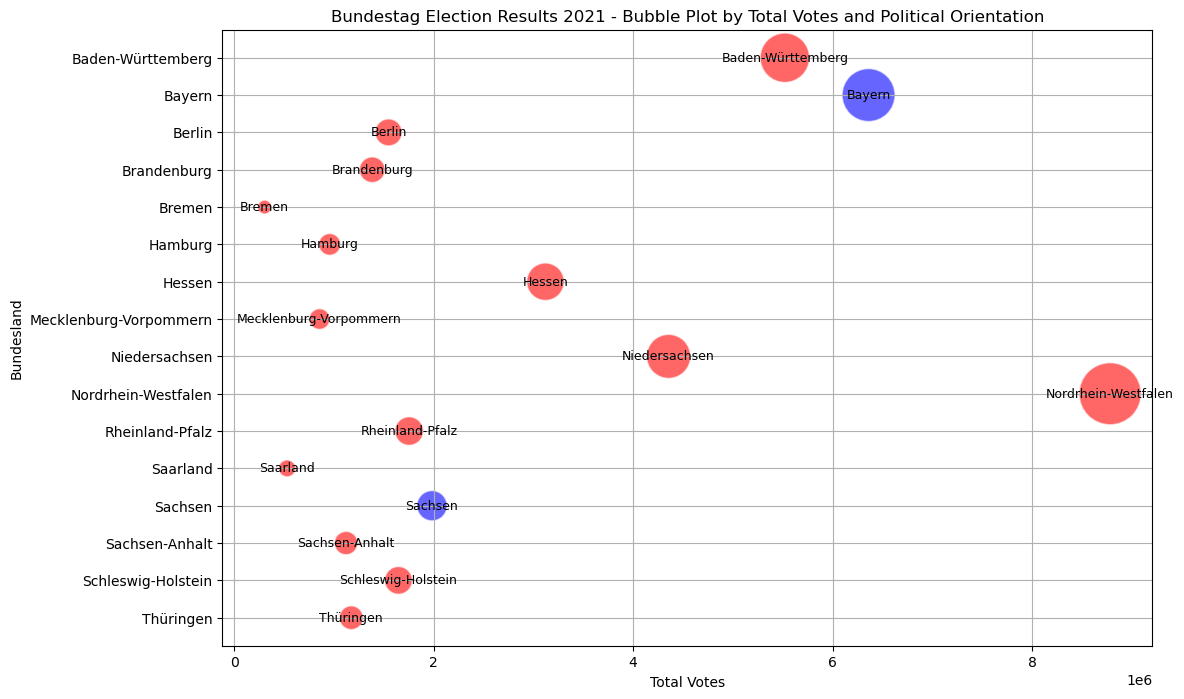

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = './hdata1.csv'
data = pd.read_csv(file_path)

# Clean column names
data.columns = data.columns.str.strip()

# Ensure columns are treated as strings and remove periods from numeric columns
for col in ['CDU/CSU', 'SPD', 'GRÜNE', 'FDP', 'AfD', 'DIELINKE']:
    data[col] = data[col].astype(str).str.replace('.', '', regex=False).astype(float)

# Define right-leaning parties
right_parties = ['CDU/CSU', 'AfD']

# Calculate total votes and right-leaning votes
data['Total_Votes'] = data[['CDU/CSU', 'SPD', 'GRÜNE', 'FDP', 'AfD', 'DIELINKE']].sum(axis=1)
data['Right_Votes'] = data[right_parties].sum(axis=1)

# Determine bubble color based on more votes for right-leaning parties
data['Color'] = data['Right_Votes'] > (data['Total_Votes'] / 2)
data['Color'] = data['Color'].map({True: 'blue', False: 'red'})

# Plotting
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data, x='Total_Votes', y='Bundesland', size='Total_Votes', hue='Color',
                sizes=(100, 2000), legend=False, alpha=0.6, palette=['red', 'blue'])

# Add annotations
for index, row in data.iterrows():
    plt.text(row['Total_Votes'], index, row['Bundesland'], horizontalalignment='center', verticalalignment='center', fontsize=9)

plt.ylabel('Bundesland')
plt.xlabel('Total Votes')
plt.title('Bundestag Election Results 2021 - Bubble Plot by Total Votes and Political Orientation')
plt.grid(True)

# Show plot
plt.show()


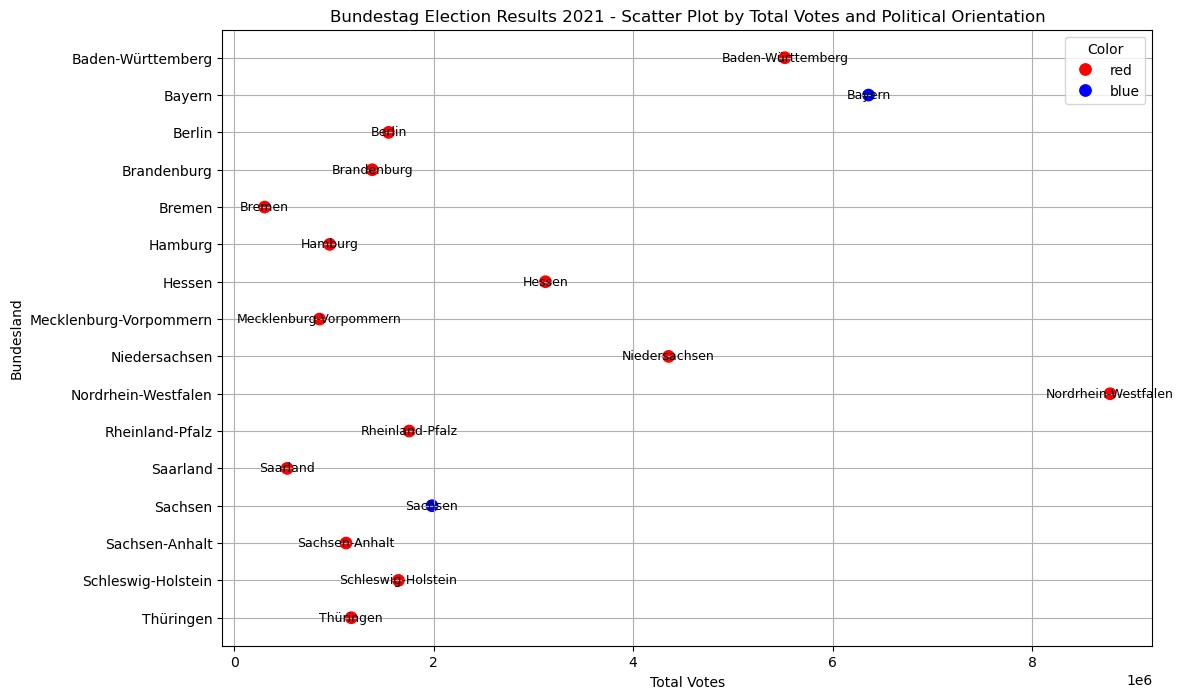

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = './hdata1.csv'
data = pd.read_csv(file_path)

# Clean column names
data.columns = data.columns.str.strip()

# Ensure columns are treated as strings and remove periods from numeric columns
for col in ['CDU/CSU', 'SPD', 'GRÜNE', 'FDP', 'AfD', 'DIELINKE']:
    data[col] = data[col].astype(str).str.replace('.', '', regex=False).astype(float)

# Define right-leaning parties
right_parties = ['CDU/CSU', 'AfD']

# Calculate total votes and right-leaning votes
data['Total_Votes'] = data[['CDU/CSU', 'SPD', 'GRÜNE', 'FDP', 'AfD', 'DIELINKE']].sum(axis=1)
data['Right_Votes'] = data[right_parties].sum(axis=1)

# Determine bubble color based on more votes for right-leaning parties
data['Color'] = data['Right_Votes'] > (data['Total_Votes'] / 2)
data['Color'] = data['Color'].map({True: 'blue', False: 'red'})

# Plotting
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data, x='Total_Votes', y='Bundesland', hue='Color', palette=['red', 'blue'], s=100)

# Add annotations
for index, row in data.iterrows():
    plt.text(row['Total_Votes'], index, row['Bundesland'], horizontalalignment='center', verticalalignment='center', fontsize=9)

plt.ylabel('Bundesland')
plt.xlabel('Total Votes')
plt.title('Bundestag Election Results 2021 - Scatter Plot by Total Votes and Political Orientation')
plt.grid(True)

# Show plot
plt.show()


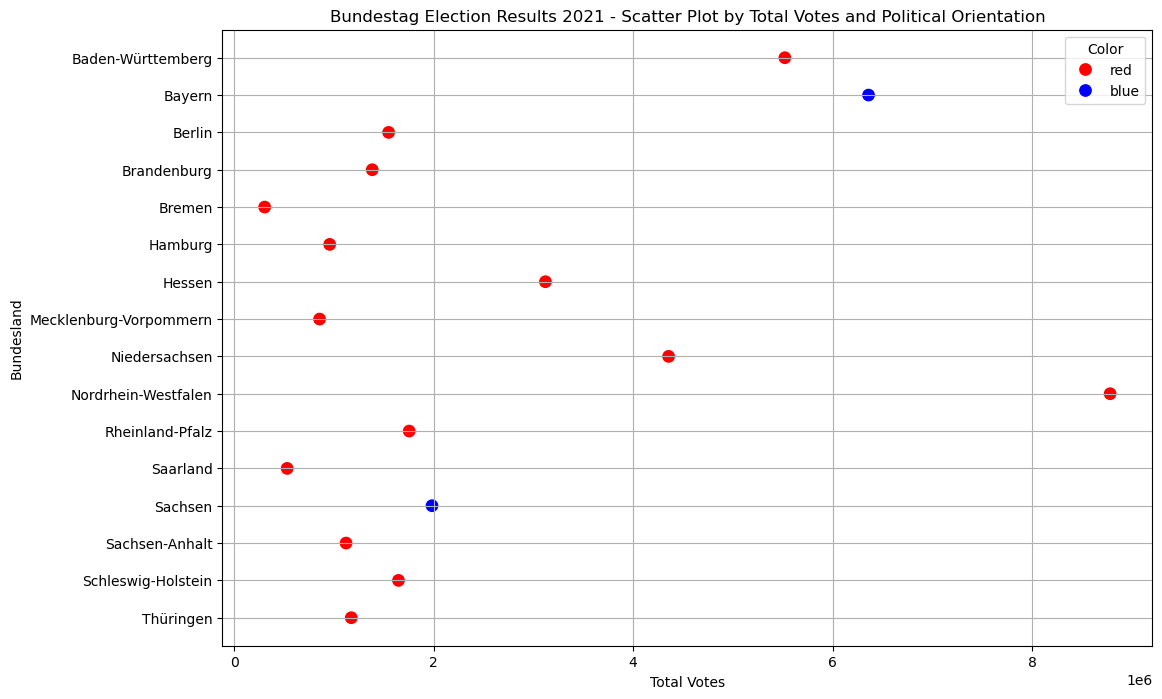

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = './hdata1.csv'
data = pd.read_csv(file_path)

# Clean column names
data.columns = data.columns.str.strip()

# Ensure columns are treated as strings and remove periods from numeric columns
for col in ['CDU/CSU', 'SPD', 'GRÜNE', 'FDP', 'AfD', 'DIELINKE']:
    data[col] = data[col].astype(str).str.replace('.', '', regex=False).astype(float)

# Define right-leaning parties
right_parties = ['CDU/CSU', 'AfD']

# Calculate total votes and right-leaning votes
data['Total_Votes'] = data[['CDU/CSU', 'SPD', 'GRÜNE', 'FDP', 'AfD', 'DIELINKE']].sum(axis=1)
data['Right_Votes'] = data[right_parties].sum(axis=1)

# Determine bubble color based on more votes for right-leaning parties
data['Color'] = data['Right_Votes'] > (data['Total_Votes'] / 2)
data['Color'] = data['Color'].map({True: 'blue', False: 'red'})

# Plotting
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data, x='Total_Votes', y='Bundesland', hue='Color', palette=['red', 'blue'], s=100)

plt.ylabel('Bundesland')
plt.xlabel('Total Votes')
plt.title('Bundestag Election Results 2021 - Scatter Plot by Total Votes and Political Orientation')
plt.grid(True)

# Show plot
plt.show()

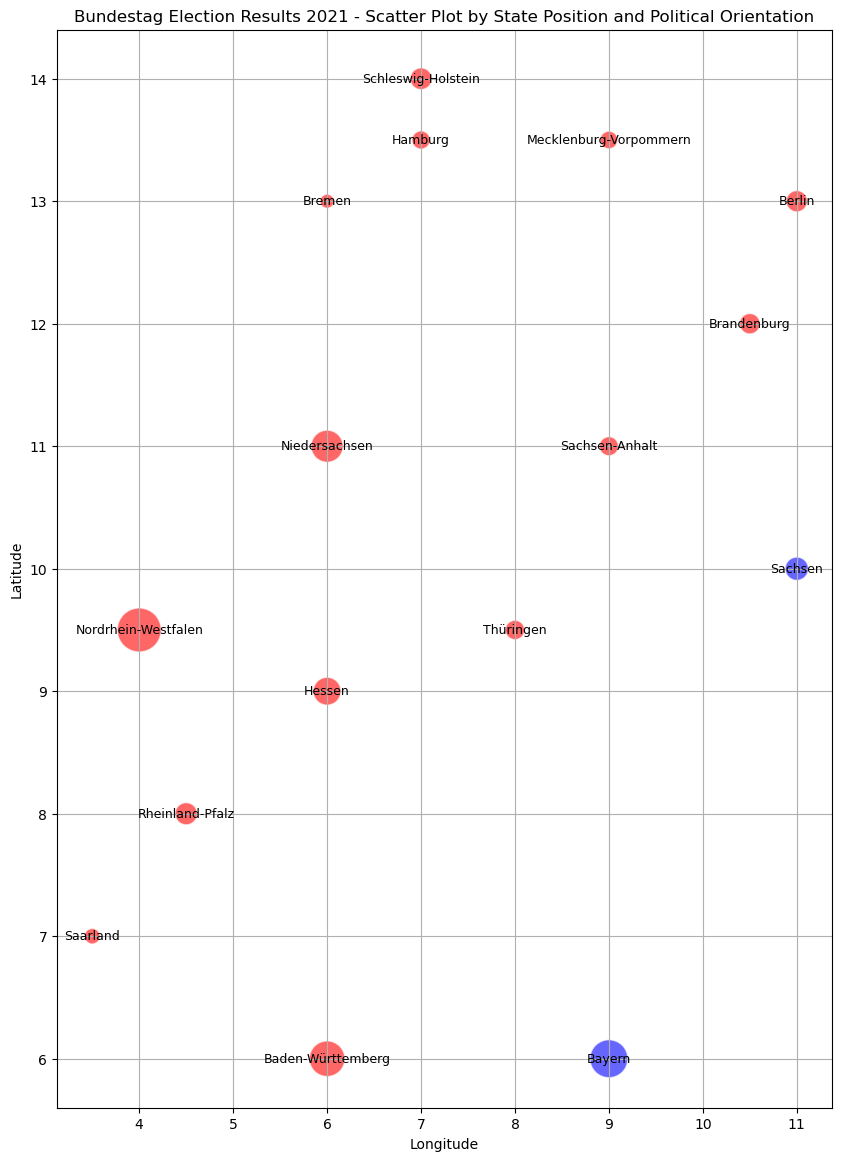

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = './hdata1.csv'
data = pd.read_csv(file_path)

# Clean column names
data.columns = data.columns.str.strip()

# Ensure columns are treated as strings and remove periods from numeric columns
for col in ['CDU/CSU', 'SPD', 'GRÜNE', 'FDP', 'AfD', 'DIELINKE']:
    data[col] = data[col].astype(str).str.replace('.', '', regex=False).astype(float)

# Define approximate coordinates for each state based on the Germany map
coordinates = {
    'Schleswig-Holstein': (7, 14),
    'Hamburg': (7.0, 13.5),
    'Bremen': (6.0, 13),
    'Niedersachsen': (6, 11),
    'Mecklenburg-Vorpommern': (9, 13.5),
    'Nordrhein-Westfalen': (4, 9.5),
    'Rheinland-Pfalz': (4.5, 8),
    'Saarland': (3.5, 7),
    'Hessen': (6, 9),
    'Berlin': (11, 13),
    'Brandenburg': (10.5, 12),
    'Sachsen': (11, 10),
    'Sachsen-Anhalt': (9, 11),
    'Thüringen': (8, 9.5),
    'Bayern': (9, 6),
    'Baden-Württemberg': (6, 6)
}

# Add coordinates to the data
data['Coordinates'] = data['Bundesland'].map(coordinates)
data[['X', 'Y']] = pd.DataFrame(data['Coordinates'].tolist(), index=data.index)

# Define right-leaning parties
right_parties = ['CDU/CSU', 'AfD']

# Calculate total votes and right-leaning votes
data['Total_Votes'] = data[['CDU/CSU', 'SPD', 'GRÜNE', 'FDP', 'AfD', 'DIELINKE']].sum(axis=1)
data['Right_Votes'] = data[right_parties].sum(axis=1)

# Determine bubble color based on more votes for right-leaning parties
data['Color'] = data['Right_Votes'] > (data['Total_Votes'] / 2)
data['Color'] = data['Color'].map({True: 'blue', False: 'red'})

# Plotting
plt.figure(figsize=(10, 14))
sns.scatterplot(data=data, x='X', y='Y', hue='Color', palette=['red', 'blue'], size='Total_Votes', sizes=(100, 1000), legend=False, alpha=0.6)

# Add state names as annotations
for index, row in data.iterrows():
    plt.text(row['X'], row['Y'], row['Bundesland'], horizontalalignment='center', verticalalignment='center', fontsize=9)

plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.title('Bundestag Election Results 2021 - Scatter Plot by State Position and Political Orientation')
plt.grid(True)

# Show plot
plt.show()


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
data = pd.read_csv("./hdata1.csv")

# Clean column names
data.columns = data.columns.str.strip()

# Print the column names to verify and adjust them if necessary
print(data.columns)

# Ensure columns are treated as strings and remove periods from numeric columns
for col in ['CDU/CSU', 'SPD', 'GRÜNE', 'FDP', 'AfD', 'DIELINKE']:
    data[col] = data[col].astype(str).str.replace('.', '', regex=False).astype(float)

# Define weights for each party
party_weights = {
    'DIELINKE': 1.5,
    'GRÜNE': 3.5,
    'SPD': 3.8,
    'FDP': 4.9,
    'CDU': 5.1,
    'CSU': 5.5,
    'AfD': 8.2
}

# Calculate the weighted score for each state
data['Weighted_Score'] = (data['DIELINKE'] * party_weights['DIELINKE'] +
                          data['GRÜNE'] * party_weights['GRÜNE'] +
                          data['SPD'] * party_weights['SPD'] +
                          data['FDP'] * party_weights['FDP'] +
                          data['CDU/CSU'] * (party_weights['CDU'] + party_weights['CSU']) / 2 +
                          data['AfD'] * party_weights['AfD']) / data[['DIELINKE', 'GRÜNE', 'SPD', 'FDP', 'CDU/CSU', 'AfD']].sum(axis=1)

# Normalize the weighted score to a 0-10 scale
data['Normalized_Score'] = (data['Weighted_Score'] - data['Weighted_Score'].min()) / (data['Weighted_Score'].max() - data['Weighted_Score'].min()) * 10

# Define a colormap from red to blue
cmap = sns.color_palette("coolwarm", as_cmap=True)

# Create a color column based on the normalized score
norm = plt.Normalize(data['Normalized_Score'].min(), data['Normalized_Score'].max())
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
data['Color'] = data['Normalized_Score'].map(lambda x: sm.to_rgba(x))

# Define approximate coordinates for each state based on the Germany map
coordinates = {
    'Schleswig-Holstein': (7, 14),
    'Hamburg': (7.0, 13.5),
    'Bremen': (6.0, 13),
    'Niedersachsen': (6, 11),
    'Mecklenburg-Vorpommern': (9, 13.5),
    'Nordrhein-Westfalen': (4, 9.5),
    'Rheinland-Pfalz': (4.5, 8),
    'Saarland': (3.5, 7),
    'Hessen': (6, 9),
    'Berlin': (11, 13),
    'Brandenburg': (10.5, 12),
    'Sachsen': (11, 10),
    'Sachsen-Anhalt': (9, 11),
    'Thüringen': (8, 9.5),
    'Bayern': (9, 6),
    'Baden-Württemberg': (6, 6)
}

# Add coordinates to the data
data['Coordinates'] = data['Bundesland'].map(coordinates)
data[['X', 'Y']] = pd.DataFrame(data['Coordinates'].tolist(), index=data.index)

# Plotting
plt.figure(figsize=(10, 14))
colors = [sm.to_rgba(score) for score in data['Normalized_Score']]
sns.scatterplot(data=data, x='X', y='Y', hue='Normalized_Score', palette=colors, size='Total_Votes', sizes=(100, 1000), legend=False, alpha=0.6)

# Add state names as annotations
for index, row in data.iterrows():
    plt.text(row['X'], row['Y'], row['Bundesland'], horizontalalignment='center', verticalalignment='center', fontsize=9)

plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.title('Bundestag Election Results 2021 - Scatter Plot by State Position and Weighted Political Orientation')
plt.grid(True)

# Show plot
plt.show()


Index(['Bundesland', 'Prozente', 'GueltigeWaelende', 'CDU/CSU', 'SPD', 'GRÜNE',
       'FDP', 'AfD', 'DIELINKE', 'Unnamed: 9'],
      dtype='object')


ValueError: Could not interpret value `Total_Votes` for `size`. An entry with this name does not appear in `data`.

<Figure size 1000x1400 with 0 Axes>

/tmp/ipykernel_61735/4283704068.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=region_data.index, y=region_data['Total_Votes'], palette=region_data['Color'].to_dict())


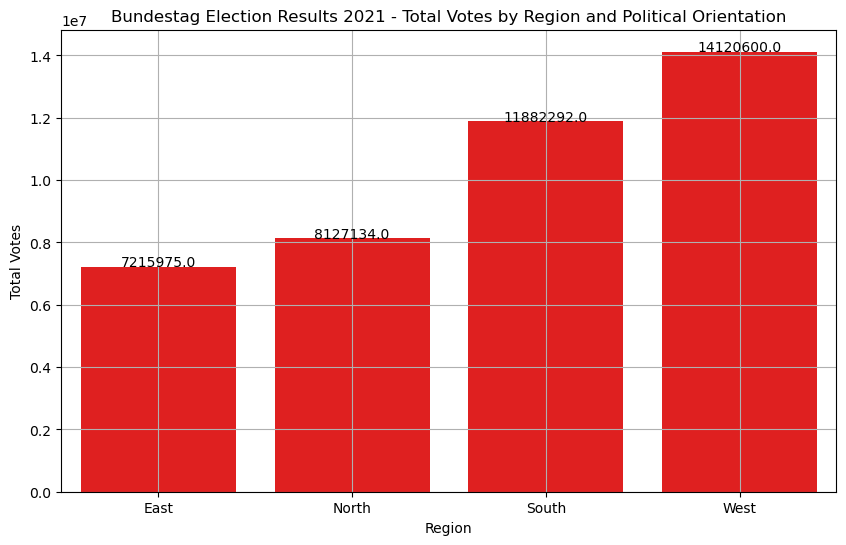

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = './hdata1.csv'
data = pd.read_csv(file_path)

# Clean column names
data.columns = data.columns.str.strip()

# Ensure columns are treated as strings and remove periods from numeric columns
for col in ['CDU/CSU', 'SPD', 'GRÜNE', 'FDP', 'AfD', 'DIELINKE']:
    data[col] = data[col].astype(str).str.replace('.', '', regex=False).astype(float)

# Define right-leaning parties
right_parties = ['CDU/CSU', 'AfD']

# Calculate total votes and right-leaning votes
data['Total_Votes'] = data[['CDU/CSU', 'SPD', 'GRÜNE', 'FDP', 'AfD', 'DIELINKE']].sum(axis=1)
data['Right_Votes'] = data[right_parties].sum(axis=1)

# Determine the region for each state
regions = {
    'Schleswig-Holstein': 'North', 'Hamburg': 'North', 'Bremen': 'North', 'Niedersachsen': 'North', 'Mecklenburg-Vorpommern': 'North',
    'Nordrhein-Westfalen': 'West', 'Rheinland-Pfalz': 'West', 'Saarland': 'West', 'Hessen': 'West',
    'Berlin': 'East', 'Brandenburg': 'East', 'Sachsen': 'East', 'Sachsen-Anhalt': 'East', 'Thüringen': 'East',
    'Bayern': 'South', 'Baden-Württemberg': 'South'
}

data['Region'] = data['Bundesland'].map(regions)

# Aggregate votes by region
region_data = data.groupby('Region').sum()

# Determine bar color based on more votes for right-leaning parties
region_data['Color'] = region_data['Right_Votes'] > (region_data['Total_Votes'] / 2)
region_data['Color'] = region_data['Color'].map({True: 'blue', False: 'red'})

# Plotting
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=region_data.index, y=region_data['Total_Votes'], palette=region_data['Color'].to_dict())

# Add values on bars
for index, row in region_data.iterrows():
    barplot.text(index, row['Total_Votes'], round(row['Total_Votes'], 2), color='black', ha="center")

plt.xlabel('Region')
plt.ylabel('Total Votes')
plt.title('Bundestag Election Results 2021 - Total Votes by Region and Political Orientation')
plt.grid(True)

# Show plot
plt.show()


/tmp/ipykernel_61735/113154549.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=region_data.index, y=region_data['Total_Votes'], palette=region_data['Color'].to_dict())


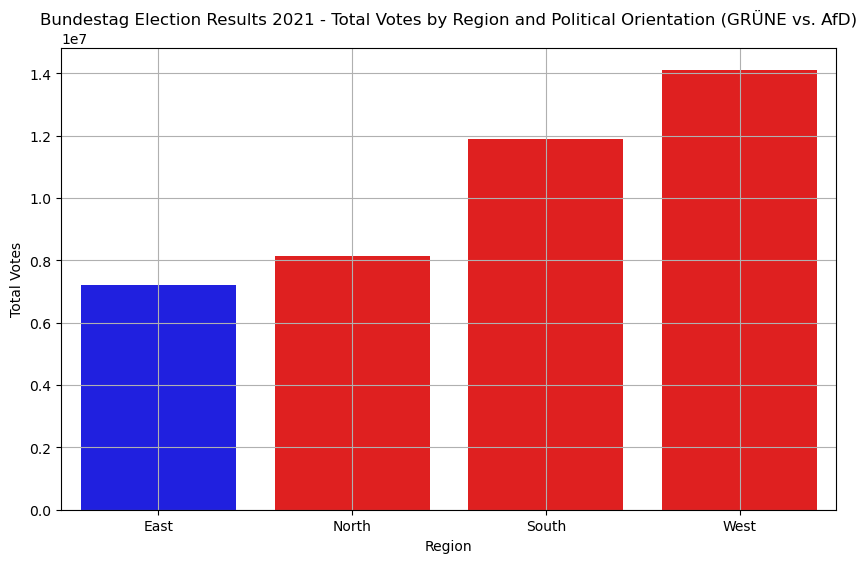

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = './hdata1.csv'
data = pd.read_csv(file_path)

# Clean column names
data.columns = data.columns.str.strip()

# Ensure columns are treated as strings and remove periods from numeric columns
for col in ['CDU/CSU', 'SPD', 'GRÜNE', 'FDP', 'AfD', 'DIELINKE']:
    data[col] = data[col].astype(str).str.replace('.', '', regex=False).astype(float)

# Define regions
regions = {
    'Schleswig-Holstein': 'North', 'Hamburg': 'North', 'Bremen': 'North', 'Niedersachsen': 'North', 'Mecklenburg-Vorpommern': 'North',
    'Nordrhein-Westfalen': 'West', 'Rheinland-Pfalz': 'West', 'Saarland': 'West', 'Hessen': 'West',
    'Berlin': 'East', 'Brandenburg': 'East', 'Sachsen': 'East', 'Sachsen-Anhalt': 'East', 'Thüringen': 'East',
    'Bayern': 'South', 'Baden-Württemberg': 'South'
}

data['Region'] = data['Bundesland'].map(regions)

# Calculate total votes and right-leaning votes
data['Total_Votes'] = data[['CDU/CSU', 'SPD', 'GRÜNE', 'FDP', 'AfD', 'DIELINKE']].sum(axis=1)

# Aggregate votes by region
region_data = data.groupby('Region').sum()

# Determine bar color based on more votes for GRÜNE than AfD
region_data['Color'] = region_data['GRÜNE'] > region_data['AfD']
region_data['Color'] = region_data['Color'].map({True: 'red', False: 'blue'})

# Plotting
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=region_data.index, y=region_data['Total_Votes'], palette=region_data['Color'].to_dict())

plt.xlabel('Region')
plt.ylabel('Total Votes')
plt.title('Bundestag Election Results 2021 - Total Votes by Region and Political Orientation (GRÜNE vs. AfD)')
plt.grid(True)

# Show plot
plt.show()


/tmp/ipykernel_1698/446999949.py:73: UserWarning: The palette list has more values (16) than needed (7), which may not be intended.
  sns.scatterplot(x=data['X'], y=data['Y'], hue=data['Normalized_Score'], palette=data['Color'], size=scores.sum(axis=0), sizes=(100, 1000), legend=False, alpha=0.6)


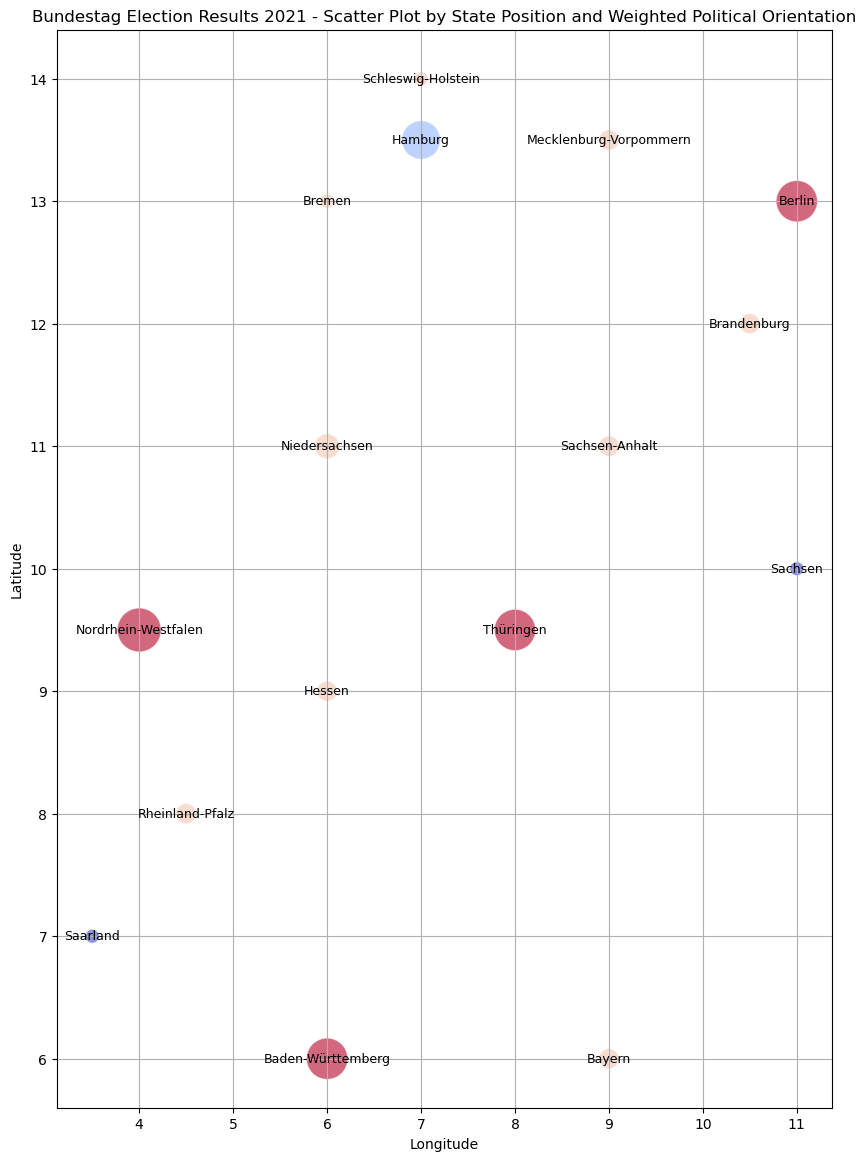

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define weights for each party
party_weights = {
    'DIELINKE': 1.5,
    'GRUENE': 3.5,
    'SPD': 3.8,
    'FDP': 4.9,
    'CDU': 5.1,
    'CSU': 5.5,
    'AfD': 8.2
}

# Simulated data for each state (in millions for simplicity)
data = {
    'Bundesland': ['Schleswig-Holstein', 'Hamburg', 'Bremen', 'Niedersachsen', 'Mecklenburg-Vorpommern',
                   'Nordrhein-Westfalen', 'Rheinland-Pfalz', 'Saarland', 'Hessen', 'Berlin', 'Brandenburg',
                   'Sachsen', 'Sachsen-Anhalt', 'Thüringen', 'Bayern', 'Baden-Württemberg'],
    'DIELINKE': [0.1, 0.2, 0.1, 0.3, 0.2, 0.4, 0.2, 0.1, 0.2, 0.3, 0.2, 0.1, 0.2, 0.3, 0.2, 0.3],
    'GRUENE': [0.5, 0.6, 0.5, 0.4, 0.5, 0.6, 0.5, 0.4, 0.5, 0.6, 0.5, 0.4, 0.5, 0.6, 0.5, 0.6],
    'SPD': [0.7, 0.8, 0.7, 0.6, 0.7, 0.8, 0.7, 0.6, 0.7, 0.8, 0.7, 0.6, 0.7, 0.8, 0.7, 0.8],
    'FDP': [0.3, 0.4, 0.3, 0.4, 0.3, 0.4, 0.3, 0.4, 0.3, 0.4, 0.3, 0.4, 0.3, 0.4, 0.3, 0.4],
    'CDU/CSU': [1.0, 1.1, 1.0, 1.2, 1.0, 1.1, 1.0, 1.2, 1.0, 1.1, 1.0, 1.2, 1.0, 1.1, 1.0, 1.1],
    'AfD': [0.8, 0.9, 0.8, 0.7, 0.8, 0.9, 0.8, 0.7, 0.8, 0.9, 0.8, 0.7, 0.8, 0.9, 0.8, 0.9]
}

# Calculate the weighted score for each state
weights = np.array([party_weights['DIELINKE'], party_weights['GRUENE'], party_weights['SPD'], 
                    party_weights['FDP'], (party_weights['CDU'] + party_weights['CSU']) / 2, 
                    party_weights['AfD']])
scores = np.array([data['DIELINKE'], data['GRUENE'], data['SPD'], data['FDP'], data['CDU/CSU'], data['AfD']])

data['Weighted_Score'] = np.dot(weights, scores) / scores.sum(axis=0)

# Normalize the weighted score to a 0-10 scale
data['Normalized_Score'] = (data['Weighted_Score'] - min(data['Weighted_Score'])) / (max(data['Weighted_Score']) - min(data['Weighted_Score'])) * 10

# Define a colormap from red to blue
cmap = sns.color_palette("coolwarm", as_cmap=True)

# Define approximate coordinates for each state based on the Germany map
coordinates = {
    'Schleswig-Holstein': (7, 14),
    'Hamburg': (7.0, 13.5),
    'Bremen': (6.0, 13),
    'Niedersachsen': (6, 11),
    'Mecklenburg-Vorpommern': (9, 13.5),
    'Nordrhein-Westfalen': (4, 9.5),
    'Rheinland-Pfalz': (4.5, 8),
    'Saarland': (3.5, 7),
    'Hessen': (6, 9),
    'Berlin': (11, 13),
    'Brandenburg': (10.5, 12),
    'Sachsen': (11, 10),
    'Sachsen-Anhalt': (9, 11),
    'Thüringen': (8, 9.5),
    'Bayern': (9, 6),
    'Baden-Württemberg': (6, 6)
}

# Add coordinates to the data
data['Coordinates'] = [coordinates[state] for state in data['Bundesland']]
data['X'], data['Y'] = zip(*data['Coordinates'])

# Plotting
plt.figure(figsize=(10, 14))
norm = plt.Normalize(min(data['Normalized_Score']), max(data['Normalized_Score']))
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
data['Color'] = [sm.to_rgba(score) for score in data['Normalized_Score']]

sns.scatterplot(x=data['X'], y=data['Y'], hue=data['Normalized_Score'], palette=data['Color'], size=scores.sum(axis=0), sizes=(100, 1000), legend=False, alpha=0.6)

# Add state names as annotations
for i, row in enumerate(data['Bundesland']):
    plt.text(data['X'][i], data['Y'][i], row, horizontalalignment='center', verticalalignment='center', fontsize=9)

plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.title('Bundestag Election Results 2021 - Scatter Plot by State Position and Weighted Political Orientation')
plt.grid(True)

# Show plot
plt.show()


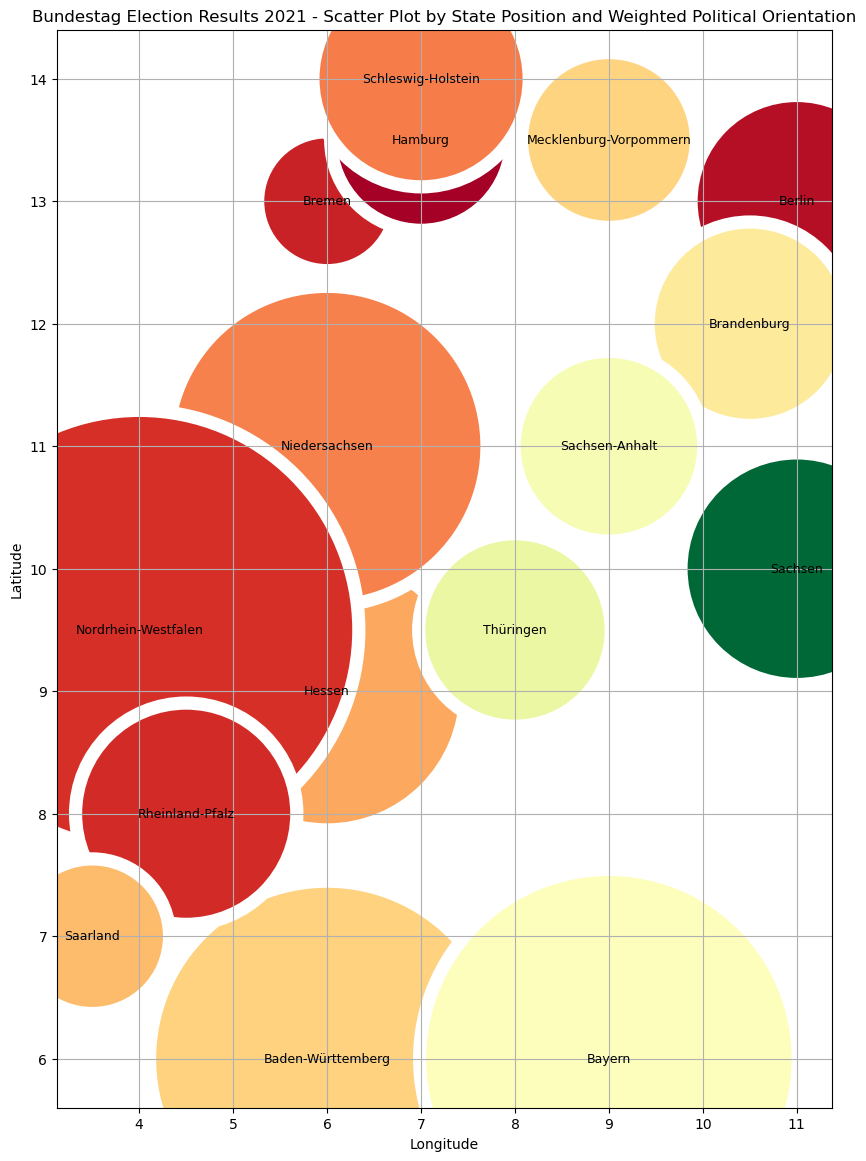

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
data = pd.read_csv("./hdata1.csv")

# Clean column names
data.columns = data.columns.str.strip()

# Ensure columns are treated as strings and remove periods from numeric columns
for col in ['CDU/CSU', 'SPD', 'GRÜNE', 'FDP', 'AfD', 'DIELINKE']:
    data[col] = data[col].astype(str).str.replace('.', '', regex=False).astype(float)

# Define weights for each party
party_weights = {
    'DIELINKE': 1.5,
    'GRÜNE': 3.5,
    'SPD': 3.8,
    'FDP': 4.9,
    'CDU': 5.1,
    'CSU': 5.5,
    'AfD': 8.2
}

# Calculate the weighted score for each state
weights = np.array([party_weights['DIELINKE'], party_weights['GRÜNE'], party_weights['SPD'], 
                    party_weights['FDP'], (party_weights['CDU'] + party_weights['CSU']) / 2, 
                    party_weights['AfD']])
scores = np.array([data['DIELINKE'], data['GRÜNE'], data['SPD'], data['FDP'], data['CDU/CSU'], data['AfD']])

data['Weighted_Score'] = np.dot(weights, scores) / scores.sum(axis=0)

# Normalize the weighted score to a 0-10 scale
data['Normalized_Score'] = (data['Weighted_Score'] - data['Weighted_Score'].min()) / (data['Weighted_Score'].max() - data['Weighted_Score'].min()) * 10

# Define a colormap from red to blue
cmap = sns.color_palette("coolwarm", as_cmap=True)

# Create a color column based on the normalized score
norm = plt.Normalize(data['Normalized_Score'].min(), data['Normalized_Score'].max())
data['Color'] = data['Normalized_Score'].map(lambda x: cmap(norm(x)))

# Define approximate coordinates for each state based on the Germany map
coordinates = {
    'Schleswig-Holstein': (7, 14),
    'Hamburg': (7.0, 13.5),
    'Bremen': (6.0, 13),
    'Niedersachsen': (6, 11),
    'Mecklenburg-Vorpommern': (9, 13.5),
    'Nordrhein-Westfalen': (4, 9.5),
    'Rheinland-Pfalz': (4.5, 8),
    'Saarland': (3.5, 7),
    'Hessen': (6, 9),
    'Berlin': (11, 13),
    'Brandenburg': (10.5, 12),
    'Sachsen': (11, 10),
    'Sachsen-Anhalt': (9, 11),
    'Thüringen': (8, 9.5),
    'Bayern': (9, 6),
    'Baden-Württemberg': (6, 6)
}

# Add coordinates to the data
data['Coordinates'] = data['Bundesland'].map(coordinates)
data[['X', 'Y']] = pd.DataFrame(data['Coordinates'].tolist(), index=data.index)

# Plotting
plt.figure(figsize=(10, 14))
sns.scatterplot(x=data['X'], y=data['Y'], hue=data['Normalized_Score'], palette='coolwarm', size=scores.sum(axis=0), sizes=(10000, 100000), legend=False, alpha=0.6)

# Add state names as annotations
for i, row in enumerate(data['Bundesland']):
    plt.text(data['X'][i], data['Y'][i], row, horizontalalignment='center', verticalalignment='center', fontsize=9)

plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.title('Bundestag Election Results 2021 - Scatter Plot by State Position and Weighted Political Orientation')
plt.grid(True)

# Show plot
plt.show()


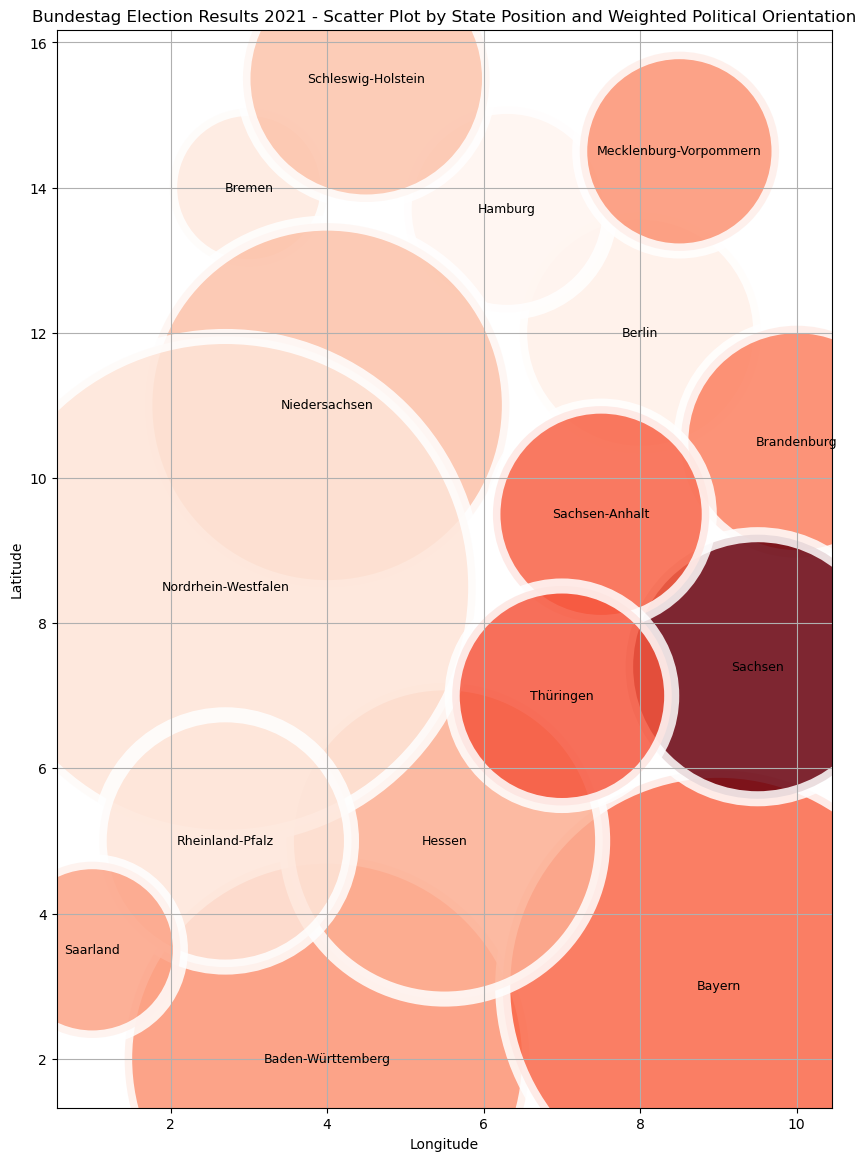

In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
data = pd.read_csv("./hdata1.csv")

# Clean column names
data.columns = data.columns.str.strip()

# Ensure columns are treated as strings and remove periods from numeric columns
for col in ['CDU/CSU', 'SPD', 'GRÜNE', 'FDP', 'AfD', 'DIELINKE']:
    data[col] = data[col].astype(str).str.replace('.', '', regex=False).astype(float)

# Define weights for each party
party_weights = {
    'DIELINKE': 1.5,
    'GRÜNE': 3.5,
    'SPD': 3.8,
    'FDP': 4.9,
    'CDU': 5.1,
    'CSU': 5.5,
    'AfD': 8.2
}

# Calculate the weighted score for each state
weights = np.array([party_weights['DIELINKE'], party_weights['GRÜNE'], party_weights['SPD'], 
                    party_weights['FDP'], (party_weights['CDU'] + party_weights['CSU']) / 2, 
                    party_weights['AfD']])
scores = np.array([data['DIELINKE'], data['GRÜNE'], data['SPD'], data['FDP'], data['CDU/CSU'], data['AfD']])

data['Weighted_Score'] = np.dot(weights, scores) / scores.sum(axis=0)

# Normalize the weighted score to a 0-10 scale
data['Normalized_Score'] = (data['Weighted_Score'] - data['Weighted_Score'].min()) / (data['Weighted_Score'].max() - data['Weighted_Score'].min()) * 10

# Define a colormap from light red to dark red
cmap = sns.light_palette("red", as_cmap=True)

# Create a color column based on the normalized score
norm = plt.Normalize(data['Normalized_Score'].min(), data['Normalized_Score'].max())
data['Color'] = data['Normalized_Score'].map(lambda x: cmap(norm(x)))

# Define approximate coordinates for each state based on the Germany map
coordinates = {
    'Schleswig-Holstein': (4.5, 15.5),
    'Hamburg': (6.3, 13.7),
    'Bremen': (3, 14),
    'Niedersachsen': (4, 11),
    'Mecklenburg-Vorpommern': (8.5, 14.5),
    'Nordrhein-Westfalen': (2.7, 8.5),
    'Rheinland-Pfalz': (2.7, 5),
    'Saarland': (1,3.5),
    'Hessen': (5.5, 5),
    'Berlin': (8, 12),
    'Brandenburg': (10, 10.5),
    'Sachsen': (9.5, 7.4),
    'Sachsen-Anhalt': (7.5, 9.5),
    'Thüringen': (7, 7),
    'Bayern': (9, 3),
    'Baden-Württemberg': (4, 2)
}

# Add coordinates to the data
data['Coordinates'] = data['Bundesland'].map(coordinates)
data[['X', 'Y']] = pd.DataFrame(data['Coordinates'].tolist(), index=data.index)

# Plotting
plt.figure(figsize=(10, 14))
sns.scatterplot(x=data['X'], y=data['Y'], hue=data['Normalized_Score'], palette='Reds', size=scores.sum(axis=0), sizes=(13000,130000), legend=False, alpha=0.85)

# Add state names as annotations
for i, row in enumerate(data['Bundesland']):
    plt.text(data['X'][i], data['Y'][i], row, horizontalalignment='center', verticalalignment='center', fontsize=9)

plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.title('Bundestag Election Results 2021 - Scatter Plot by State Position and Weighted Political Orientation')
plt.grid(True)

# Show plot
plt.show()


TEXT:
Die größe der Bubbles sind nicht nach geographischer größe, sondern nach Einwohner/Stimmen
man sieht das im Osten eher rechts gewählt wird {GRUND}
Großstädte wie Berlin oder Hamburg sind eher links {GRUND}

Bayern eher rechts obwohl BRD, weil aber CSU sehr beliebt ist

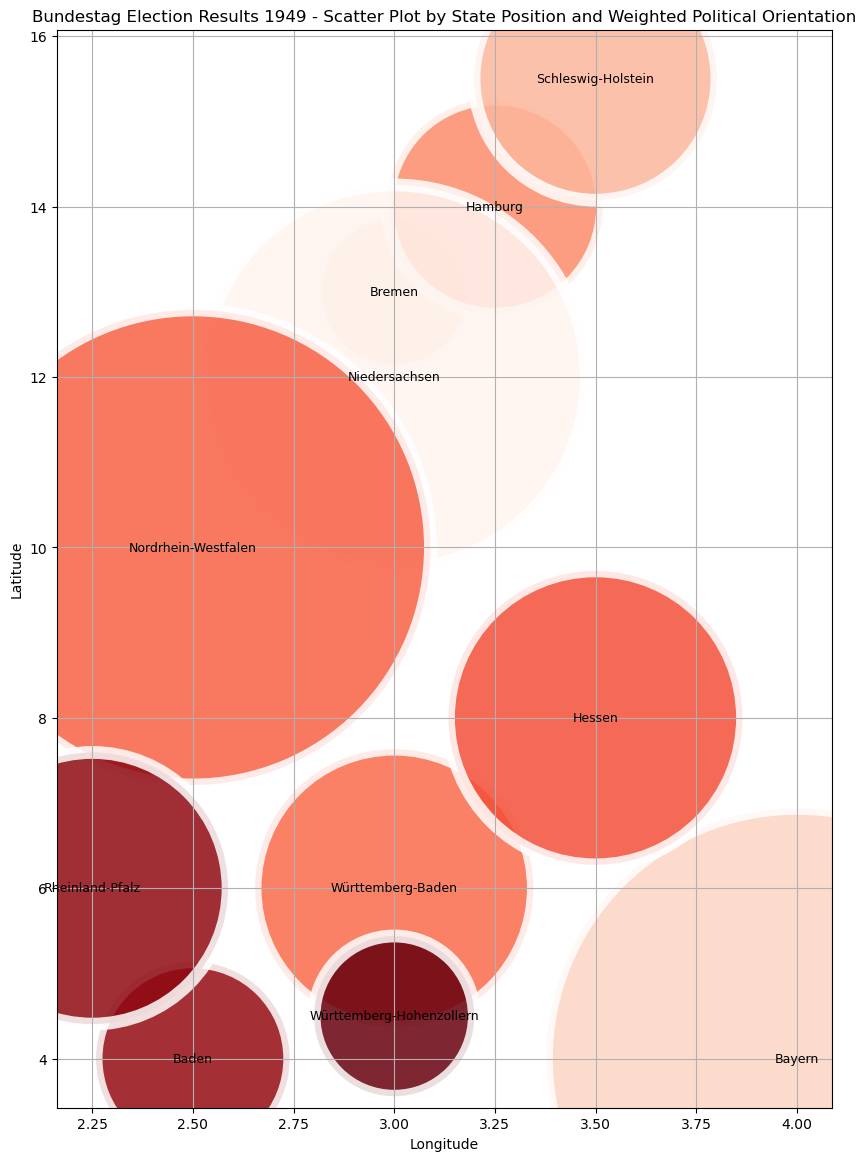

In [153]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset for 1949
data_1949 = pd.read_csv("./hdata1949.csv")

# Clean column names
data_1949.columns = data_1949.columns.str.strip()

# Ensure columns are treated as strings and remove periods from numeric columns
for col in ['CDU/CSU', 'SPD', 'FDP', 'KPD', 'Sonstige']:
    data_1949[col] = data_1949[col].astype(str).str.replace('.', '', regex=False).astype(float)

# Define weights for each party
party_weights_1949 = {
    'Sonstige': 1.5,
    'KPD': 3.5,
    'SPD': 3.8,
    'FDP': 4.9,
    'CDU/CSU': 5.3
}

# Calculate the weighted score for each state
weights_1949 = np.array([party_weights_1949['Sonstige'], party_weights_1949['KPD'], party_weights_1949['SPD'], 
                         party_weights_1949['FDP'], party_weights_1949['CDU/CSU']])
scores_1949 = np.array([data_1949['Sonstige'], data_1949['KPD'], data_1949['SPD'], data_1949['FDP'], data_1949['CDU/CSU']])

data_1949['Weighted_Score'] = np.dot(weights_1949, scores_1949) / scores_1949.sum(axis=0)

# Normalize the weighted score to a 0-10 scale
data_1949['Normalized_Score'] = (data_1949['Weighted_Score'] - data_1949['Weighted_Score'].min()) / (data_1949['Weighted_Score'].max() - data_1949['Weighted_Score'].min()) * 10

# Define a colormap from light red to dark red
cmap_1949 = sns.light_palette("red", as_cmap=True)

# Create a color column based on the normalized score
norm_1949 = plt.Normalize(data_1949['Normalized_Score'].min(), data_1949['Normalized_Score'].max())
data_1949['Color'] = data_1949['Normalized_Score'].map(lambda x: cmap_1949(norm_1949(x)))

# Define approximate coordinates for each state based on the 1949 Germany map
coordinates_1949 = {
    'Schleswig-Holstein': (3.5, 15.5),
    'Hamburg': (3.25, 14),
    'Bremen': (3.0, 13),
    'Niedersachsen': (3, 12),
    'Nordrhein-Westfalen': (2.5, 10),
    'Rheinland-Pfalz': (2.25, 6),
    'Saarland': (0, 3.5),
    'Hessen': (3.5, 8),
    'Berlin': (7, 12),
    'Brandenburg': (9, 10.5),
    'Sachsen': (8.5, 7.4),
    'Sachsen-Anhalt': (6.5, 9.5),
    'Thüringen': (6, 7),
    'Bayern': (4.0, 4),  # Adjusted x value to move Bayern closer to Württemberg-Baden
    'Baden': (2.5, 4),
    'Württemberg-Baden': (3.0, 6),
    'Württemberg-Hohenzollern': (3, 4.5)
}

# Add coordinates to the data
data_1949['Coordinates'] = data_1949['Bundesland'].map(coordinates_1949)
data_1949[['X', 'Y']] = pd.DataFrame(data_1949['Coordinates'].tolist(), index=data_1949.index)

# Adjust the size for Bayern and Nordrhein-Westfalen specifically
sizes = scores_1949.sum(axis=0)
sizes[data_1949['Bundesland'] == 'Bayern'] *= 1.5  # Increase size for Bayern
sizes[data_1949['Bundesland'] == 'Nordrhein-Westfalen'] *= 0.75  # Decrease size for Nordrhein-Westfalen

# Plotting
plt.figure(figsize=(10, 14))
sns.scatterplot(x=data_1949['X'], y=data_1949['Y'], hue=data_1949['Normalized_Score'], palette='Reds', size=sizes, sizes=(13000, 130000), legend=False, alpha=0.85)

# Add state names as annotations
for i, row in enumerate(data_1949['Bundesland']):
    plt.text(data_1949['X'][i], data_1949['Y'][i], row, horizontalalignment='center', verticalalignment='center', fontsize=9)

plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.title('Bundestag Election Results 1949 - Scatter Plot by State Position and Weighted Political Orientation')
plt.grid(True)

# Show plot
plt.show()


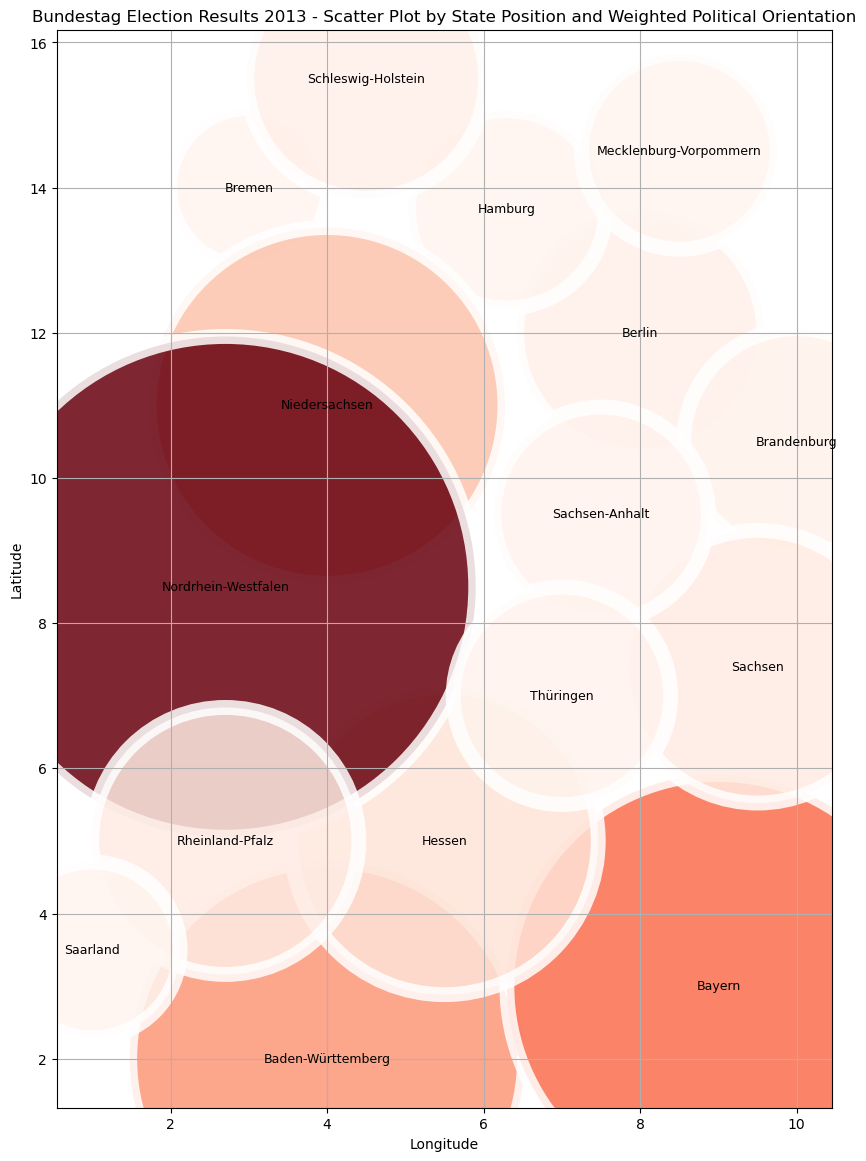

,Bundesland,GueltigeWaelende,CDU/CSU,SPD,GRÜNE,FDP,DIE LINKE,AfD,Weighted_Score,Normalized_Score,Color,Coordinates,X,Y
0,Baden-Württemberg,5627411.0,2873905.0,1332623.0,614298.0,164210.0,236251.0,133727.0,3.186340e+06,3.610714,"(0.9694860852104856, 0.6015705951901865, 0.601...","(4, 2)",4.0,2.0
1,Bayern,6571303.0,3544079.0,1443710.0,505800.0,183259.0,225218.0,146714.0,4.289813e+06,4.865060,"(0.9754765470096541, 0.4834708464411928, 0.483...","(9, 3)",9.0,3.0
2,Berlin,1785760.0,536332.0,455138.0,243259.0,25867.0,333148.0,67483.0,2.703023e+05,0.295979,"(0.9535739210564445, 0.915273052804701, 0.9151...","(8, 12)",8.0,12.0
3,Brandenburg,1383645.0,492236.0,367713.0,53549.0,21252.0,330627.0,83075.0,1.736452e+05,0.186107,"(0.9530123152627724, 0.9263449042499191, 0.926...","(10, 10.5)",10.0,10.5
4,Bremen,328811.0,97265.0,133437.0,37667.0,6360.0,28521.0,10764.0,9.923562e+03,0.000000,"(0.9522635075378764, 0.9411073728435433, 0.940...","(3, 14)",3.0,14.0
5,Hamburg,889953.0,305979.0,336337.0,94473.0,17707.0,66995.0,29835.0,7.471168e+04,0.073646,"(0.9524507094691004, 0.9374167556951373, 0.937...","(6.3, 13.7)",6.3,13.7
6,Hessen,3141269.0,1399206.0,1080828.0,236653.0,81708.0,167135.0,37910.0,9.586285e+05,1.078417,"(0.9573179596809247, 0.8414607098365798, 0.841...","(5.5, 5)",5.5,5.0
7,Mecklenburg-Vorpommern,865744.0,384607.0,165660.0,33232.0,11891.0,204479.0,48885.0,7.045172e+04,0.068804,"(0.9524507094691004, 0.9374167556951373, 0.937...","(8.5, 14.5)",8.5,14.5
8,Niedersachsen,4437558.0,1946518.0,1699556.0,299885.0,82291.0,189645.0,82424.0,1.951814e+06,2.207397,"(0.9627468156864212, 0.7344328125328043, 0.734...","(4, 11)",4.0,11.0
9,Nordrhein-Westfalen,9472593.0,4148811.0,3472520.0,606235.0,228962.0,483918.0,171511.0,8.807121e+06,10.000000,"(1.0, 0.0, 0.0, 1.0)","(2.7, 8.5)",2.7,8.5


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
data = pd.read_csv('./hdata2013.csv')

# Clean column names
data.columns = data.columns.str.strip()

# Ensure columns are treated as strings and remove periods from numeric columns
for col in ['CDU/CSU', 'SPD', 'GRÜNE', 'FDP', 'AfD', 'DIE LINKE']:
    data[col] = data[col].astype(str).str.replace('.', '', regex=False).astype(float)

# Ensure 'GueltigeWaelende' is numeric
data['GueltigeWaelende'] = data['GueltigeWaelende'].astype(str).str.replace('.', '', regex=False).astype(float)

# Define weights for each party
party_weights = {
    'DIE LINKE': 1.5,
    'GRÜNE': 3.5,
    'SPD': 3.8,
    'FDP': 4.9,
    'CDU': 5.1,
    'CSU': 5.5,
    'AfD': 8.2
}

# Calculate the weighted score for each state, incorporating valid votes
weights = np.array([party_weights['DIE LINKE'], party_weights['GRÜNE'], party_weights['SPD'], 
                    party_weights['FDP'], (party_weights['CDU'] + party_weights['CSU']) / 2, 
                    party_weights['AfD']])
scores = np.array([data['DIE LINKE'], data['GRÜNE'], data['SPD'], data['FDP'], data['CDU/CSU'], data['AfD']])

# Incorporate the number of valid votes in the weighted score
gueltige_waelende = data['GueltigeWaelende'].values.reshape(1, -1)
weighted_scores = np.dot(weights, scores * gueltige_waelende) / gueltige_waelende.sum()

# Normalize the weighted score to a 0-10 scale
data['Weighted_Score'] = weighted_scores
data['Normalized_Score'] = (data['Weighted_Score'] - data['Weighted_Score'].min()) / (data['Weighted_Score'].max() - data['Weighted_Score'].min()) * 10

# Define a colormap from light red to dark red
cmap = sns.light_palette("red", as_cmap=True)

# Create a color column based on the normalized score
norm = plt.Normalize(data['Normalized_Score'].min(), data['Normalized_Score'].max())
data['Color'] = data['Normalized_Score'].map(lambda x: cmap(norm(x)))

# Define approximate coordinates for each state based on the Germany map
coordinates = {
    'Schleswig-Holstein': (4.5, 15.5),
    'Hamburg': (6.3, 13.7),
    'Bremen': (3, 14),
    'Niedersachsen': (4, 11),
    'Mecklenburg-Vorpommern': (8.5, 14.5),
    'Nordrhein-Westfalen': (2.7, 8.5),
    'Rheinland-Pfalz': (2.7, 5),
    'Saarland': (1, 3.5),
    'Hessen': (5.5, 5),
    'Berlin': (8, 12),
    'Brandenburg': (10, 10.5),
    'Sachsen': (9.5, 7.4),
    'Sachsen-Anhalt': (7.5, 9.5),
    'Thüringen': (7, 7),
    'Bayern': (9, 3),
    'Baden-Württemberg': (4, 2)
}

# Add coordinates to the data
data['Coordinates'] = data['Bundesland'].map(coordinates)
data[['X', 'Y']] = pd.DataFrame(data['Coordinates'].tolist(), index=data.index)

# Plotting
plt.figure(figsize=(10, 14))
sns.scatterplot(x=data['X'], y=data['Y'], hue=data['Normalized_Score'], palette='Reds', size=data['GueltigeWaelende'], sizes=(13000,130000), legend=False, alpha=0.85)

# Add state names as annotations
for i, row in enumerate(data['Bundesland']):
    plt.text(data['X'][i], data['Y'][i], row, horizontalalignment='center', verticalalignment='center', fontsize=9)

plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.title('Bundestag Election Results 2013 - Scatter Plot by State Position and Weighted Political Orientation')
plt.grid(True)

# Show plot
plt.show()
data

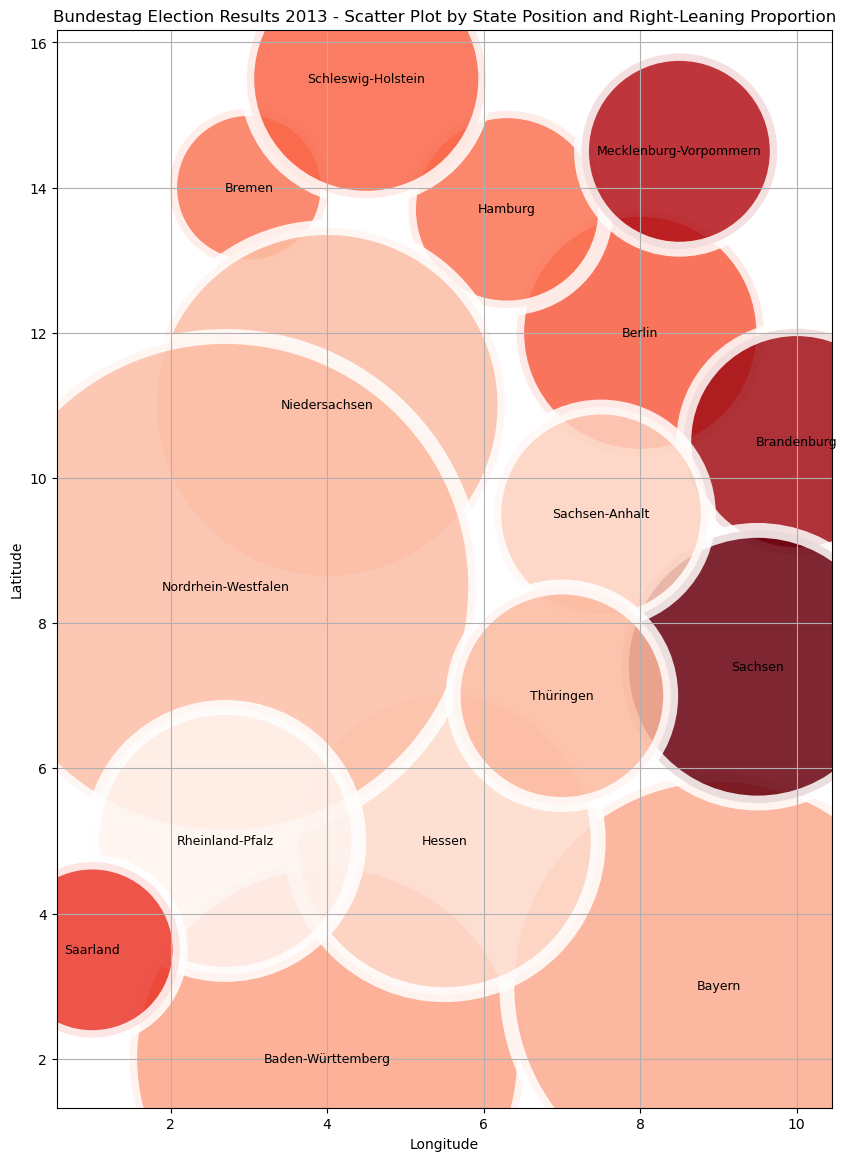

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
data = pd.read_csv('./hdata2013.csv')

# Clean column names
data.columns = data.columns.str.strip()

# Ensure columns are treated as strings and remove periods from numeric columns
for col in ['CDU/CSU', 'SPD', 'GRÜNE', 'FDP', 'AfD', 'DIE LINKE']:
    data[col] = data[col].astype(str).str.replace('.', '', regex=False).astype(float)

# Ensure 'GueltigeWaelende' is numeric
data['GueltigeWaelende'] = data['GueltigeWaelende'].astype(str).str.replace('.', '', regex=False).astype(float)

# Calculate the proportion of AfD votes
data['Right_Proportion'] = data['AfD'] / data['GueltigeWaelende']

# Normalize the right-leaning proportion to a 0-10 scale
data['Normalized_Right_Proportion'] = (data['Right_Proportion'] - data['Right_Proportion'].min()) / (data['Right_Proportion'].max() - data['Right_Proportion'].min()) * 10

# Define a colormap from light red to dark red
cmap = sns.light_palette("red", as_cmap=True)

# Create a color column based on the normalized right-leaning proportion
norm = plt.Normalize(data['Normalized_Right_Proportion'].min(), data['Normalized_Right_Proportion'].max())
data['Color'] = data['Normalized_Right_Proportion'].map(lambda x: cmap(norm(x)))

# Define approximate coordinates for each state based on the Germany map
coordinates = {
    'Schleswig-Holstein': (4.5, 15.5),
    'Hamburg': (6.3, 13.7),
    'Bremen': (3, 14),
    'Niedersachsen': (4, 11),
    'Mecklenburg-Vorpommern': (8.5, 14.5),
    'Nordrhein-Westfalen': (2.7, 8.5),
    'Rheinland-Pfalz': (2.7, 5),
    'Saarland': (1, 3.5),
    'Hessen': (5.5, 5),
    'Berlin': (8, 12),
    'Brandenburg': (10, 10.5),
    'Sachsen': (9.5, 7.4),
    'Sachsen-Anhalt': (7.5, 9.5),
    'Thüringen': (7, 7),
    'Bayern': (9, 3),
    'Baden-Württemberg': (4, 2)
}

# Add coordinates to the data
data['Coordinates'] = data['Bundesland'].map(coordinates)
data[['X', 'Y']] = pd.DataFrame(data['Coordinates'].tolist(), index=data.index)

# Plotting
plt.figure(figsize=(10, 14))
sns.scatterplot(x=data['X'], y=data['Y'], hue=data['Normalized_Right_Proportion'], palette='Reds', size=data['GueltigeWaelende'], sizes=(13000,130000), legend=False, alpha=0.85)

# Add state names as annotations
for i, row in enumerate(data['Bundesland']):
    plt.text(data['X'][i], data['Y'][i], row, horizontalalignment='center', verticalalignment='center', fontsize=9)

plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.title('Bundestag Election Results 2013 - Scatter Plot by State Position and Right-Leaning Proportion')
plt.grid(True)

# Show plot
plt.show()


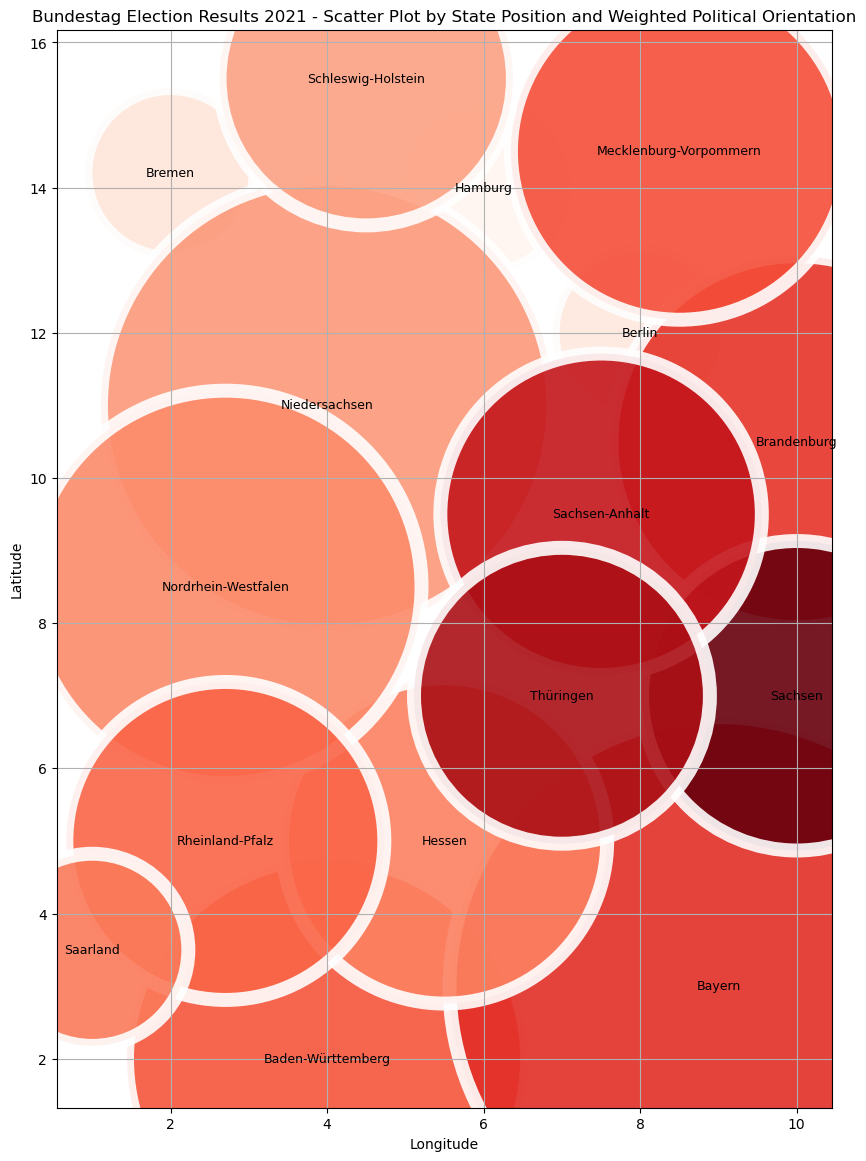

In [24]:



import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
data = pd.read_csv("./hdata1.csv")

# Clean column names
data.columns = data.columns.str.strip()

# Ensure columns are treated as strings and remove periods from numeric columns
for col in ['CDU/CSU', 'SPD', 'GRÜNE', 'FDP', 'AfD', 'DIELINKE']:
    data[col] = data[col].astype(str).str.replace('.', '', regex=False).astype(float)

# Define weights for each party
party_weights = {
    'DIELINKE': 1.5,
    'GRÜNE': 3.5,
    'SPD': 3.8,
    'FDP': 4.9,
    'CDU': 5.1,
    'CSU': 5.5,
    'AfD': 8.2
}

# Calculate the weighted score for each state
weights = np.array([party_weights['DIELINKE'], party_weights['GRÜNE'], party_weights['SPD'], 
                    party_weights['FDP'], (party_weights['CDU'] + party_weights['CSU']) / 2, 
                    party_weights['AfD']])
scores = np.array([data['DIELINKE'], data['GRÜNE'], data['SPD'], data['FDP'], data['CDU/CSU'], data['AfD']])

data['Weighted_Score'] = np.dot(weights, scores) / scores.sum(axis=0)

# Normalize the weighted score to a 0-10 scale
data['Normalized_Score'] = (data['Weighted_Score'] - data['Weighted_Score'].min()) / (data['Weighted_Score'].max() - data['Weighted_Score'].min()) * 10

# Define a colormap from light red to dark red
cmap = sns.light_palette("red", as_cmap=True)

# Create a color column based on the normalized score
norm = plt.Normalize(data['Normalized_Score'].min(), data['Normalized_Score'].max())
data['Color'] = data['Normalized_Score'].map(lambda x: cmap(norm(x)))

# Define approximate coordinates for each state based on the Germany map
coordinates = {
    'Schleswig-Holstein': (4.5, 15.5),
    'Hamburg': (6, 14),
    'Bremen': (2, 14.2),
    'Niedersachsen': (4, 11),
    'Mecklenburg-Vorpommern': (8.5, 14.5),
    'Nordrhein-Westfalen': (2.7, 8.5),
    'Rheinland-Pfalz': (2.7, 5),
    'Saarland': (1,3.5),
    'Hessen': (5.5, 5),
    'Berlin': (8, 12),
    'Brandenburg': (10, 10.5),
    'Sachsen': (10, 7),
    'Sachsen-Anhalt': (7.5, 9.5),
    'Thüringen': (7, 7),
    'Bayern': (9, 3),
    'Baden-Württemberg': (4, 2)
}

# Add coordinates to the data
data['Coordinates'] = data['Bundesland'].map(coordinates)
data[['X', 'Y']] = pd.DataFrame(data['Coordinates'].tolist(), index=data.index)

# Define geographic sizes for each state
state_areas = {
    'Schleswig-Holstein': 15800,
    'Hamburg': 755,
    'Bremen': 419,
    'Niedersachsen': 47709,
    'Mecklenburg-Vorpommern': 23180,
    'Nordrhein-Westfalen': 34084,
    'Rheinland-Pfalz': 19854,
    'Saarland': 2571,
    'Hessen': 21115,
    'Berlin': 891,
    'Brandenburg': 29654,
    'Sachsen': 18416,
    'Sachsen-Anhalt': 20451,
    'Thüringen': 16202,
    'Bayern': 70542,
    'Baden-Württemberg': 35751
}

# Add state sizes to the data
data['State_Size'] = data['Bundesland'].map(state_areas)

# Plotting
plt.figure(figsize=(10, 14))
sns.scatterplot(x=data['X'], y=data['Y'], hue=data['Normalized_Score'], palette='Reds', size=data['State_Size'], sizes=(15000, 150000), legend=False, alpha=0.9)

# Add state names as annotations
for i, row in enumerate(data['Bundesland']):
    plt.text(data['X'][i], data['Y'][i], row, horizontalalignment='center', verticalalignment='center', fontsize=9)

plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.title('Bundestag Election Results 2021 - Scatter Plot by State Position and Weighted Political Orientation')
plt.grid(True)

# Show plot
plt.show()


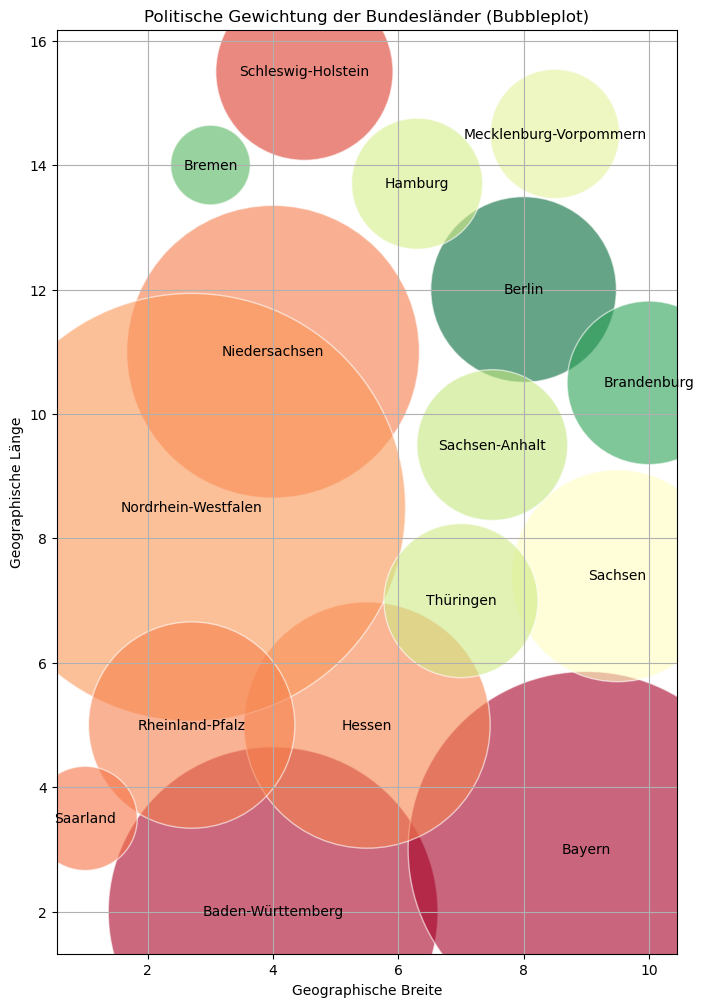

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

# Define the weights for each party based on their political alignment
weights = {
    'CDU/CSU': 2,
    'SPD': 1,
    'GRÜNE': 0.5,
    'FDP': 1.5,
    'DIE LINKE': 0.5,
    'AfD': 4  # Updated weight for AfD
}

# Load the data from the CSV file
data = pd.read_csv('./hdata2013.csv')

# Calculate the new political weighting considering the total number of votes and all parties
data['Total Adjusted Weighting'] = (
    (data['CDU/CSU'] * weights['CDU/CSU'] +
     data['SPD'] * weights['SPD'] +
     data['GRÜNE'] * weights['GRÜNE'] +
     data['FDP'] * weights['FDP'] +
     data['DIE LINKE'] * weights['DIE LINKE'] +
     data['AfD'] * weights['AfD']) / data['GueltigeWaelende']
)

# Normalize the total adjusted weighting values for the color map
norm_total_adjusted = plt.Normalize(data['Total Adjusted Weighting'].min(), data['Total Adjusted Weighting'].max())

# Create a colormap from green to red (darker red indicates higher weighting)
colormap_red_to_green = plt.cm.RdYlGn_r

# Calculate the new colors based on total adjusted weighting
total_adjusted_colors = colormap_red_to_green(norm_total_adjusted(data['Total Adjusted Weighting']))

# Generate bubble sizes
bubble_sizes = data['GueltigeWaelende'] / 10000 

# Zuordnung der Koordinaten zu den Bundesländern
coordinates = {
    'Schleswig-Holstein': (4.5, 15.5),
    'Hamburg': (6.3, 13.7),
    'Bremen': (3, 14),
    'Niedersachsen': (4, 11),
    'Mecklenburg-Vorpommern': (8.5, 14.5),
    'Nordrhein-Westfalen': (2.7, 8.5),
    'Rheinland-Pfalz': (2.7, 5),
    'Saarland': (1, 3.5),
    'Hessen': (5.5, 5),
    'Berlin': (8, 12),
    'Brandenburg': (10, 10.5),
    'Sachsen': (9.5, 7.4),
    'Sachsen-Anhalt': (7.5, 9.5),
    'Thüringen': (7, 7),
    'Bayern': (9, 3),
    'Baden-Württemberg': (4, 2)
}

# Hinzufügen der Koordinaten zu den Daten
data['x'] = data['Bundesland'].map(lambda bl: coordinates[bl][0])
data['y'] = data['Bundesland'].map(lambda bl: coordinates[bl][1])

# Erstellung des Bubbleplots
plt.figure(figsize=(8, 12))
plt.scatter(data['x'], data['y'], s=bubble_sizes*50, c=total_adjusted_colors, alpha=0.6, edgecolors='w')

# Anpassung der Achsen und Beschriftungen
plt.xlabel('Geographische Breite')
plt.ylabel('Geographische Länge')
plt.title('Politische Gewichtung der Bundesländer (Bubbleplot)')
plt.grid(True)

# Hinzufügen von Beschriftungen für jedes Bundesland
for i, row in data.iterrows():
    plt.text(row['x'], row['y'], row['Bundesland'], horizontalalignment='center', verticalalignment='center')

plt.show()

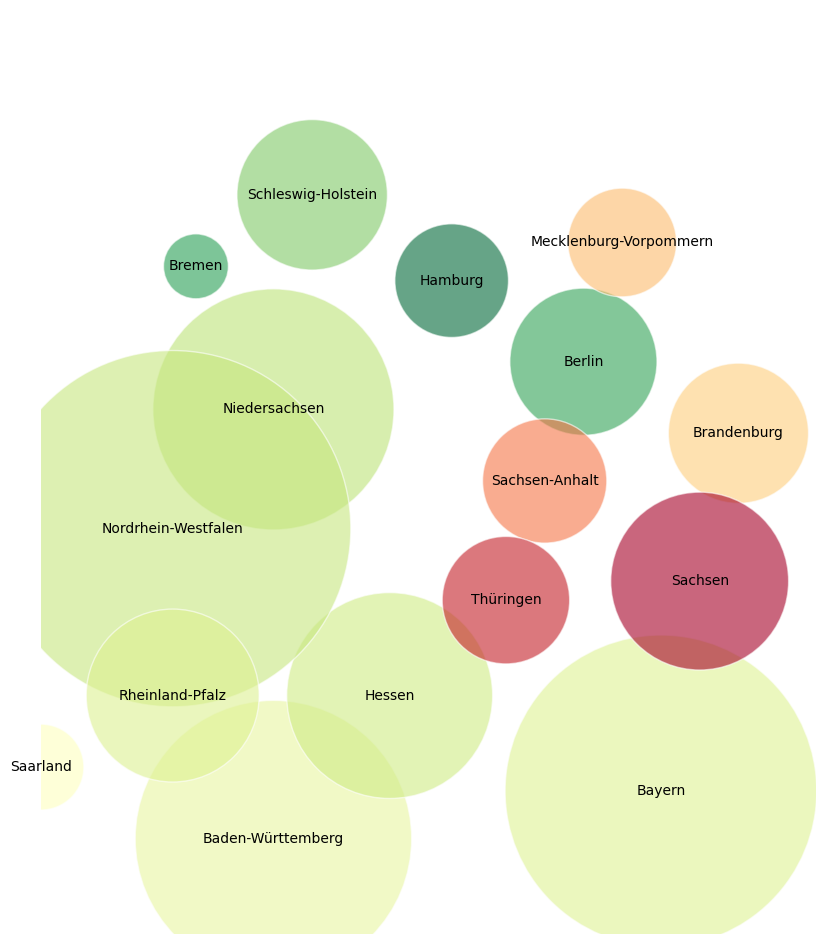

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

# Define the weights for each party based on their political alignment
weights = {
    'CDU/CSU': 2,
    'SPD': 1,
    'GRÜNE': 0.5,
    'FDP': 1.5,
    'DIELINKE': 0.5,
    'AfD': 4  # Updated weight for AfD
}

# Load the data from the CSV file
data = pd.read_csv('./hdata1.csv')

# Calculate the new political weighting considering the total number of votes and all parties
data['Total Adjusted Weighting'] = (
    (data['CDU/CSU'] * weights['CDU/CSU'] +
     data['SPD'] * weights['SPD'] +
     data['GRÜNE'] * weights['GRÜNE'] +
     data['FDP'] * weights['FDP'] +
     data['DIELINKE'] * weights['DIELINKE'] +
     data['AfD'] * weights['AfD']) / data['GueltigeWaelende']
)

# Normalize the total adjusted weighting values for the color map
norm_total_adjusted = plt.Normalize(data['Total Adjusted Weighting'].min(), data['Total Adjusted Weighting'].max())

# Create a colormap from green to red (darker red indicates higher weighting)
colormap_red_to_green = plt.cm.RdYlGn_r

# Calculate the new colors based on total adjusted weighting
total_adjusted_colors = colormap_red_to_green(norm_total_adjusted(data['Total Adjusted Weighting']))

# Generate bubble sizes
bubble_sizes = data['GueltigeWaelende'] / 15000 

# Zuordnung der Koordinaten zu den Bundesländern
coordinates = {
    'Schleswig-Holstein': (4.5, 15.5),
    'Hamburg': (6.3, 13.7),
    'Bremen': (3, 14),
    'Niedersachsen': (4, 11),
    'Mecklenburg-Vorpommern': (8.5, 14.5),
    'Nordrhein-Westfalen': (2.7, 8.5),
    'Rheinland-Pfalz': (2.7, 5),
    'Saarland': (1, 3.5),
    'Hessen': (5.5, 5),
    'Berlin': (8, 12),
    'Brandenburg': (10, 10.5),
    'Sachsen': (9.5, 7.4),
    'Sachsen-Anhalt': (7.5, 9.5),
    'Thüringen': (7, 7),
    'Bayern': (9, 3),
    'Baden-Württemberg': (4, 2)
}

# Hinzufügen der Koordinaten zu den Daten
data['x'] = data['Bundesland'].map(lambda bl: coordinates[bl][0])
data['y'] = data['Bundesland'].map(lambda bl: coordinates[bl][1])

# Erstellung des Bubbleplots
plt.figure(figsize=(10, 12))  # Vergrößern der Figur für die Legende
scatter = plt.scatter(data['x'], data['y'], s=bubble_sizes*100, c=total_adjusted_colors, alpha=0.6, edgecolors='w')

# Anpassung der Achsenbereiche, um abgeschnittene Blasen zu vermeiden
plt.xlim(1, max(data['x']) + 1)
plt.ylim(0, max(data['y']) * 1.25)

# Entfernen der Achsen und Gitternetz
plt.gca().set_xticks([])
plt.gca().set_yticks([])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

# Hinzufügen von Beschriftungen für jedes Bundesland
for i, row in data.iterrows():
    plt.text(row['x'], row['y'], row['Bundesland'], horizontalalignment='center', verticalalignment='center')


plt.show()

#Überschrift und Unterschrift
# x bei 1 anfangen und weitere hoöhe
# hintergrund outline  


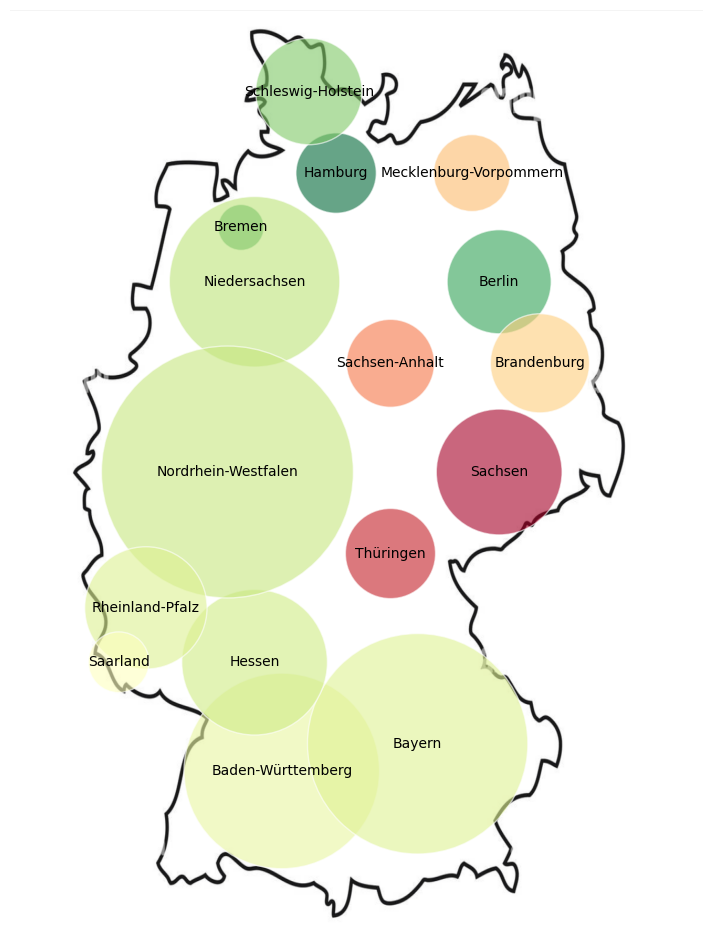

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import matplotlib.image as mpimg

# Define the weights for each party based on their political alignment
weights = {
    'CDU/CSU': 2,
    'SPD': 1,
    'GRÜNE': 0.5,
    'FDP': 1.5,
    'DIELINKE': 0.5,
    'AfD': 4  # Updated weight for AfD
}

# Load the data from the CSV file
data = pd.read_csv('./hdata1.csv')

# Calculate the new political weighting considering the total number of votes and all parties
data['Total Adjusted Weighting'] = (
    (data['CDU/CSU'] * weights['CDU/CSU'] +
     data['SPD'] * weights['SPD'] +
     data['GRÜNE'] * weights['GRÜNE'] +
     data['FDP'] * weights['FDP'] +
     data['DIELINKE'] * weights['DIELINKE'] +
     data['AfD'] * weights['AfD']) / data['GueltigeWaelende']
)

# Normalize the total adjusted weighting values for the color map
norm_total_adjusted = plt.Normalize(data['Total Adjusted Weighting'].min(), data['Total Adjusted Weighting'].max())

# Create a colormap from green to red (darker red indicates higher weighting)
colormap_red_to_green = plt.cm.RdYlGn_r

# Calculate the new colors based on total adjusted weighting
total_adjusted_colors = colormap_red_to_green(norm_total_adjusted(data['Total Adjusted Weighting']))

# Generate bubble sizes
bubble_sizes = data['GueltigeWaelende'] / 15000 

# Zuordnung der Koordinaten zu den Bundesländern
coordinates = {
    'Schleswig-Holstein': (6.5, 15.5),
    'Hamburg': (7, 14),
    'Bremen': (5.25, 13),
    'Niedersachsen': (5.5, 12),
    'Mecklenburg-Vorpommern': (9.5, 14),
    'Nordrhein-Westfalen': (5, 8.5),
    'Rheinland-Pfalz': (3.5, 6),
    'Saarland': (3.0, 5),
    'Hessen': (5.5, 5),
    'Berlin': (10, 12),
    'Brandenburg': (10.75, 10.5),
    'Sachsen': (10, 8.5),
    'Sachsen-Anhalt': (8, 10.5),
    'Thüringen': (8, 7),
    'Bayern': (8.5, 3.5),
    'Baden-Württemberg': (6, 3.0)
}

# Hinzufügen der Koordinaten zu den Daten
data['x'] = data['Bundesland'].map(lambda bl: coordinates[bl][0])
data['y'] = data['Bundesland'].map(lambda bl: coordinates[bl][1])

# Hintergrundbild laden
background_image = mpimg.imread('./image.png')

# Erstellung des Bubbleplots
plt.figure(figsize=(12, 12))  # Vergrößern der Figur für die Legende

# Hintergrundbild anzeigen
plt.imshow(background_image, extent=[0, 14, 0, 17])

# Blasenplot hinzufügen
scatter = plt.scatter(data['x'], data['y'], s=bubble_sizes*50, c=total_adjusted_colors, alpha=0.6, edgecolors='w')

# Anpassung der Achsenbereiche, um abgeschnittene Blasen zu vermeiden
plt.xlim(1, max(data['x']) + 3)
plt.ylim(0, max(data['y']) + 1.5)

# Entfernen der Achsen und Gitternetz
plt.gca().set_xticks([])
plt.gca().set_yticks([])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

# Hinzufügen von Beschriftungen für jedes Bundesland
for i, row in data.iterrows():
    plt.text(row['x'], row['y'], row['Bundesland'], horizontalalignment='center', verticalalignment='center')

plt.show()



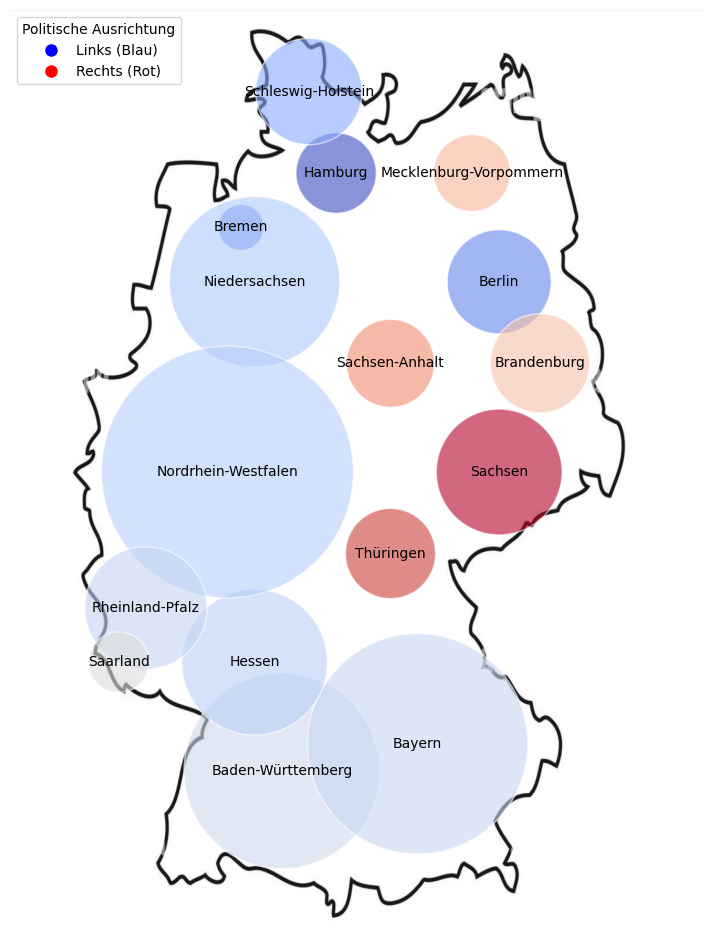

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import matplotlib.image as mpimg

# Define the weights for each party based on their political alignment
weights = {
    'CDU/CSU': 2,
    'SPD': 1,
    'GRÜNE': 0.5,
    'FDP': 1.5,
    'DIELINKE': 0.5,
    'AfD': 4  # Updated weight for AfD
}

# Load the data from the CSV file
data = pd.read_csv('./hdata1.csv')

# Calculate the new political weighting considering the total number of votes and all parties
data['Total Adjusted Weighting'] = (
    (data['CDU/CSU'] * weights['CDU/CSU'] +
     data['SPD'] * weights['SPD'] +
     data['GRÜNE'] * weights['GRÜNE'] +
     data['FDP'] * weights['FDP'] +
     data['DIELINKE'] * weights['DIELINKE'] +
     data['AfD'] * weights['AfD']) / data['GueltigeWaelende']
)

# Normalize the total adjusted weighting values for the color map
norm_total_adjusted = plt.Normalize(data['Total Adjusted Weighting'].min(), data['Total Adjusted Weighting'].max())

# Create a colormap from blue to orange (darker orange indicates higher weighting)
colormap_blue_to_orange = plt.cm.coolwarm

# Calculate the new colors based on total adjusted weighting
total_adjusted_colors = colormap_blue_to_orange(norm_total_adjusted(data['Total Adjusted Weighting']))

# Generate bubble sizes
bubble_sizes = data['GueltigeWaelende'] / 15000 

# Zuordnung der Koordinaten zu den Bundesländern
coordinates = {
    'Schleswig-Holstein': (6.5, 15.5),
    'Hamburg': (7, 14),
    'Bremen': (5.25, 13),
    'Niedersachsen': (5.5, 12),
    'Mecklenburg-Vorpommern': (9.5, 14),
    'Nordrhein-Westfalen': (5, 8.5),
    'Rheinland-Pfalz': (3.5, 6),
    'Saarland': (3.0, 5),
    'Hessen': (5.5, 5),
    'Berlin': (10, 12),
    'Brandenburg': (10.75, 10.5),
    'Sachsen': (10, 8.5),
    'Sachsen-Anhalt': (8, 10.5),
    'Thüringen': (8, 7),
    'Bayern': (8.5, 3.5),
    'Baden-Württemberg': (6, 3.0)
}

# Hinzufügen der Koordinaten zu den Daten
data['x'] = data['Bundesland'].map(lambda bl: coordinates[bl][0])
data['y'] = data['Bundesland'].map(lambda bl: coordinates[bl][1])

# Hintergrundbild laden
background_image = mpimg.imread('./image.png')

# Erstellung des Bubbleplots
plt.figure(figsize=(12, 12))  # Vergrößern der Figur für die Legende

# Hintergrundbild anzeigen
plt.imshow(background_image, extent=[0, 14, 0, 17])

# Blasenplot hinzufügen
scatter = plt.scatter(data['x'], data['y'], s=bubble_sizes*50, c=total_adjusted_colors, alpha=0.6, edgecolors='w')

# Anpassung der Achsenbereiche, um abgeschnittene Blasen zu vermeiden
plt.xlim(1, max(data['x']) + 3)
plt.ylim(0, max(data['y']) + 1.5)

# Entfernen der Achsen und Gitternetz
plt.gca().set_xticks([])
plt.gca().set_yticks([])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

# Hinzufügen von Beschriftungen für jedes Bundesland
for i, row in data.iterrows():
    plt.text(row['x'], row['y'], row['Bundesland'], horizontalalignment='center', verticalalignment='center')

# Hinzufügen der Legende
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', label='Links (Blau)',
               markerfacecolor='blue', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='Rechts (Rot)',
               markerfacecolor='red', markersize=10)
]
plt.legend(handles=legend_elements, loc='upper left', title='Politische Ausrichtung')

plt.show()


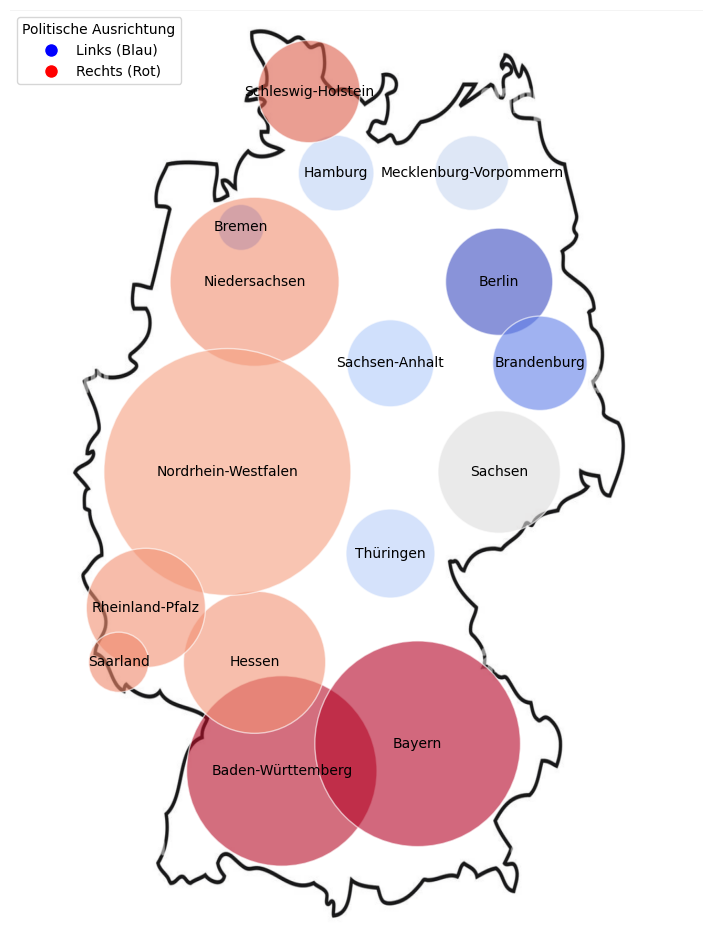

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import matplotlib.image as mpimg

# Define the weights for each party based on their political alignment
weights = {
    'CDU/CSU': 2,
    'SPD': 1,
    'GRÜNE': 0.5,
    'FDP': 1.5,
    'DIELINKE': 0.5,
    'AfD': 4  # Updated weight for AfD
}

# Load the data from the new CSV file
data = pd.read_csv('./hdata2013.csv')

# Calculate the new political weighting considering the total number of votes and all parties
data['Total Adjusted Weighting'] = (
    (data['CDU/CSU'] * weights['CDU/CSU'] +
     data['SPD'] * weights['SPD'] +
     data['GRÜNE'] * weights['GRÜNE'] +
     data['FDP'] * weights['FDP'] +
     data['DIELINKE'] * weights['DIELINKE'] +
     data['AfD'] * weights['AfD']) / data['GueltigeWaelende']
)

# Normalize the total adjusted weighting values for the color map
norm_total_adjusted = plt.Normalize(data['Total Adjusted Weighting'].min(), data['Total Adjusted Weighting'].max())

# Create a colormap from blue to orange (darker orange indicates higher weighting)
colormap_blue_to_orange = plt.cm.coolwarm

# Calculate the new colors based on total adjusted weighting
total_adjusted_colors = colormap_blue_to_orange(norm_total_adjusted(data['Total Adjusted Weighting']))

# Generate bubble sizes
bubble_sizes = data['GueltigeWaelende'] / 15000 

# Zuordnung der Koordinaten zu den Bundesländern
coordinates = {
    'Schleswig-Holstein': (6.5, 15.5),
    'Hamburg': (7, 14),
    'Bremen': (5.25, 13),
    'Niedersachsen': (5.5, 12),
    'Mecklenburg-Vorpommern': (9.5, 14),
    'Nordrhein-Westfalen': (5, 8.5),
    'Rheinland-Pfalz': (3.5, 6),
    'Saarland': (3.0, 5),
    'Hessen': (5.5, 5),
    'Berlin': (10, 12),
    'Brandenburg': (10.75, 10.5),
    'Sachsen': (10, 8.5),
    'Sachsen-Anhalt': (8, 10.5),
    'Thüringen': (8, 7),
    'Bayern': (8.5, 3.5),
    'Baden-Württemberg': (6, 3.0)
}

# Hinzufügen der Koordinaten zu den Daten
data['x'] = data['Bundesland'].map(lambda bl: coordinates[bl][0])
data['y'] = data['Bundesland'].map(lambda bl: coordinates[bl][1])

# Hintergrundbild laden
background_image = mpimg.imread('./image.png')

# Erstellung des Bubbleplots
plt.figure(figsize=(12, 12))  # Vergrößern der Figur für die Legende

# Hintergrundbild anzeigen
plt.imshow(background_image, extent=[0, 14, 0, 17])

# Blasenplot hinzufügen
scatter = plt.scatter(data['x'], data['y'], s=bubble_sizes*25, c=total_adjusted_colors, alpha=0.6, edgecolors='w')

# Anpassung der Achsenbereiche, um abgeschnittene Blasen zu vermeiden
plt.xlim(1, max(data['x']) + 3)
plt.ylim(0, max(data['y']) + 1.5)

# Entfernen der Achsen und Gitternetz
plt.gca().set_xticks([])
plt.gca().set_yticks([])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

# Hinzufügen von Beschriftungen für jedes Bundesland
for i, row in data.iterrows():
    plt.text(row['x'], row['y'], row['Bundesland'], horizontalalignment='center', verticalalignment='center')

# Hinzufügen der Legende
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', label='Links (Blau)',
               markerfacecolor='blue', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='Rechts (Rot)',
               markerfacecolor='red', markersize=10)
]
plt.legend(handles=legend_elements, loc='upper left', title='Politische Ausrichtung')

plt.show()


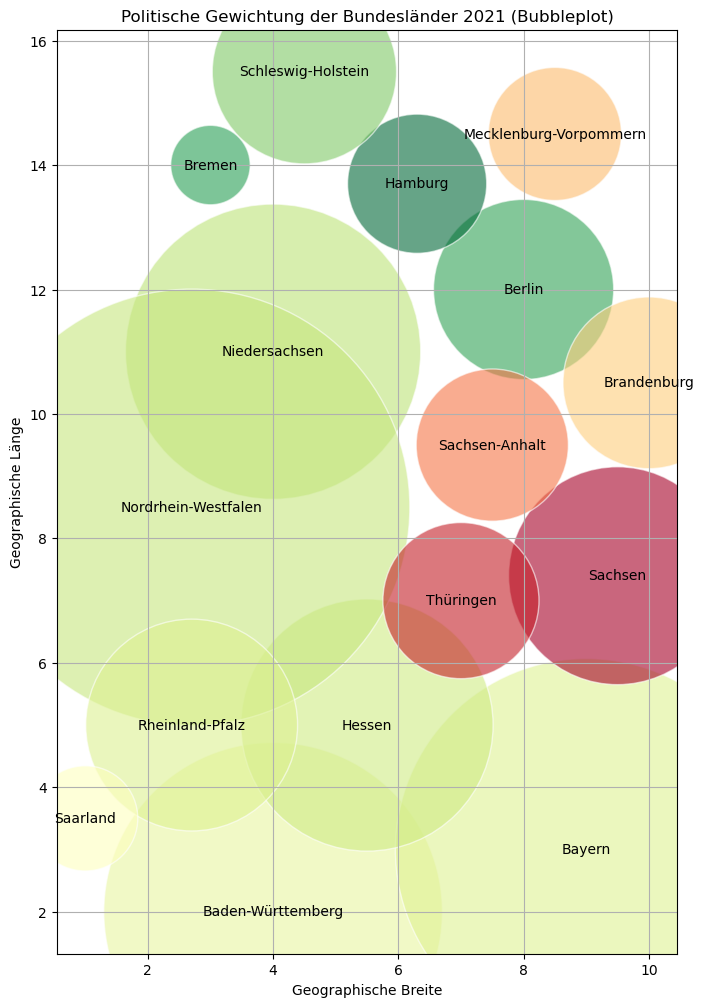

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

# Define the weights for each party based on their political alignment
weights = {
    'CDU/CSU': 2,
    'SPD': 1,
    'GRÜNE': 0.5,
    'FDP': 1.5,
    'DIELINKE': 0.5,
    'AfD': 4  # Updated weight for AfD
}

# Load the data from the CSV file
data = pd.read_csv('./hdata1.csv')

# Calculate the new political weighting considering the total number of votes and all parties
data['Total Adjusted Weighting'] = (
    (data['CDU/CSU'] * weights['CDU/CSU'] +
     data['SPD'] * weights['SPD'] +
     data['GRÜNE'] * weights['GRÜNE'] +
     data['FDP'] * weights['FDP'] +
     data['DIELINKE'] * weights['DIELINKE'] +
     data['AfD'] * weights['AfD']) / data['GueltigeWaelende']
)

# Normalize the total adjusted weighting values for the color map
norm_total_adjusted = plt.Normalize(data['Total Adjusted Weighting'].min(), data['Total Adjusted Weighting'].max())

# Create a colormap from green to red (darker red indicates higher weighting)
colormap_red_to_green = plt.cm.RdYlGn_r

# Calculate the new colors based on total adjusted weighting
total_adjusted_colors = colormap_red_to_green(norm_total_adjusted(data['Total Adjusted Weighting']))

# Generate bubble sizes
bubble_sizes = data['GueltigeWaelende'] / 10000 

# Zuordnung der Koordinaten zu den Bundesländern
coordinates = {
    'Schleswig-Holstein': (4.5, 15.5),
    'Hamburg': (6.3, 13.7),
    'Bremen': (3, 14),
    'Niedersachsen': (4, 11),
    'Mecklenburg-Vorpommern': (8.5, 14.5),
    'Nordrhein-Westfalen': (2.7, 8.5),
    'Rheinland-Pfalz': (2.7, 5),
    'Saarland': (1, 3.5),
    'Hessen': (5.5, 5),
    'Berlin': (8, 12),
    'Brandenburg': (10, 10.5),
    'Sachsen': (9.5, 7.4),
    'Sachsen-Anhalt': (7.5, 9.5),
    'Thüringen': (7, 7),
    'Bayern': (9, 3),
    'Baden-Württemberg': (4, 2)
}

# Hinzufügen der Koordinaten zu den Daten
data['x'] = data['Bundesland'].map(lambda bl: coordinates[bl][0])
data['y'] = data['Bundesland'].map(lambda bl: coordinates[bl][1])

# Erstellung des Bubbleplots
plt.figure(figsize=(8, 12))
plt.scatter(data['x'], data['y'], s=bubble_sizes*100, c=total_adjusted_colors, alpha=0.6, edgecolors='w')

# Anpassung der Achsen und Beschriftungen
plt.xlabel('Geographische Breite')
plt.ylabel('Geographische Länge')
plt.title('Politische Gewichtung der Bundesländer 2021 (Bubbleplot)')
plt.grid(True)

# Hinzufügen von Beschriftungen für jedes Bundesland
for i, row in data.iterrows():
    plt.text(row['x'], row['y'], row['Bundesland'], horizontalalignment='center', verticalalignment='center')


plt.show()


/tmp/ipykernel_935/1452956221.py:82: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.ax.set_yticklabels(['Stark links', 'Links', 'Neutral', 'Rechts', 'Stark rechts'])


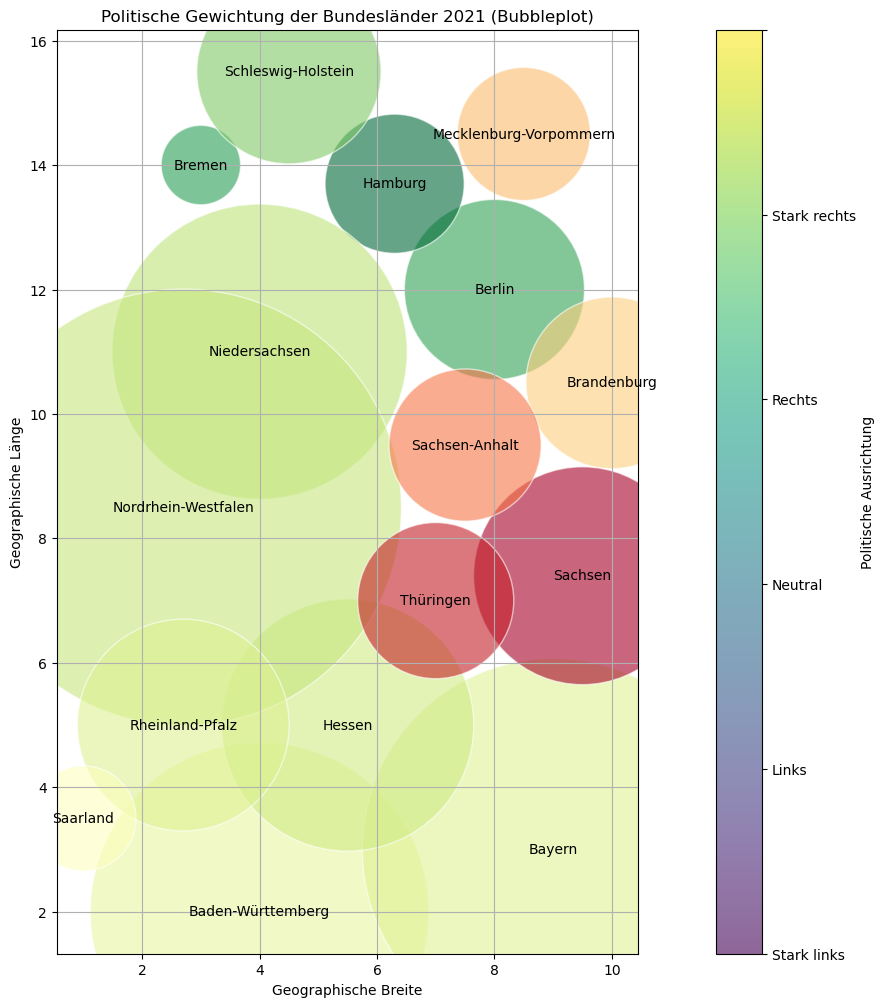

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

# Define the weights for each party based on their political alignment
weights = {
    'CDU/CSU': 2,
    'SPD': 1,
    'GRÜNE': 0.5,
    'FDP': 1.5,
    'DIELINKE': 0.5,
    'AfD': 4  # Updated weight for AfD
}

# Load the data from the CSV file
data = pd.read_csv('./hdata1.csv')

# Calculate the new political weighting considering the total number of votes and all parties
data['Total Adjusted Weighting'] = (
    (data['CDU/CSU'] * weights['CDU/CSU'] +
     data['SPD'] * weights['SPD'] +
     data['GRÜNE'] * weights['GRÜNE'] +
     data['FDP'] * weights['FDP'] +
     data['DIELINKE'] * weights['DIELINKE'] +
     data['AfD'] * weights['AfD']) / data['GueltigeWaelende']
)

# Normalize the total adjusted weighting values for the color map
norm_total_adjusted = plt.Normalize(data['Total Adjusted Weighting'].min(), data['Total Adjusted Weighting'].max())

# Create a colormap from green to red (darker red indicates higher weighting)
colormap_red_to_green = plt.cm.RdYlGn_r

# Calculate the new colors based on total adjusted weighting
total_adjusted_colors = colormap_red_to_green(norm_total_adjusted(data['Total Adjusted Weighting']))

# Generate bubble sizes
bubble_sizes = data['GueltigeWaelende'] / 10000 

# Zuordnung der Koordinaten zu den Bundesländern
coordinates = {
    'Schleswig-Holstein': (4.5, 15.5),
    'Hamburg': (6.3, 13.7),
    'Bremen': (3, 14),
    'Niedersachsen': (4, 11),
    'Mecklenburg-Vorpommern': (8.5, 14.5),
    'Nordrhein-Westfalen': (2.7, 8.5),
    'Rheinland-Pfalz': (2.7, 5),
    'Saarland': (1, 3.5),
    'Hessen': (5.5, 5),
    'Berlin': (8, 12),
    'Brandenburg': (10, 10.5),
    'Sachsen': (9.5, 7.4),
    'Sachsen-Anhalt': (7.5, 9.5),
    'Thüringen': (7, 7),
    'Bayern': (9, 3),
    'Baden-Württemberg': (4, 2)
}

# Hinzufügen der Koordinaten zu den Daten
data['x'] = data['Bundesland'].map(lambda bl: coordinates[bl][0])
data['y'] = data['Bundesland'].map(lambda bl: coordinates[bl][1])

# Erstellung des Bubbleplots
plt.figure(figsize=(10, 12))  # Vergrößern der Figur für die Legende
scatter = plt.scatter(data['x'], data['y'], s=bubble_sizes*100, c=total_adjusted_colors, alpha=0.6, edgecolors='w')

# Anpassung der Achsen und Beschriftungen
plt.xlabel('Geographische Breite')
plt.ylabel('Geographische Länge')
plt.title('Politische Gewichtung der Bundesländer 2021 (Bubbleplot)')
plt.grid(True)

# Hinzufügen von Beschriftungen für jedes Bundesland
for i, row in data.iterrows():
    plt.text(row['x'], row['y'], row['Bundesland'], horizontalalignment='center', verticalalignment='center')

# Hinzufügen der Heatmap-Legende
cbar = plt.colorbar(scatter, ax=plt.gca(), orientation='vertical', pad=0.1)
cbar.set_label('Politische Ausrichtung')
cbar.ax.set_yticklabels(['Stark links', 'Links', 'Neutral', 'Rechts', 'Stark rechts'])

plt.show()
